# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
import DiadFit as pf
pf.__version__

'0.0.59'

## Specifying filetype, and folder as before

In [29]:
MasterFolder = r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Raman\Leilani-2018"
DayFolder = os.path.join(MasterFolder, "Leilani_2018FI_Ap523")

meta_path=DayFolder +  '\Metadata'
spectra_path=DayFolder + '\Spectra'
filetype='headless_txt'

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')

# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [30]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [31]:
GroupN_df

filename rays_present  approx_split    Diad1_pos  \
0              FO-1_CRR_DiadFit.txt         True    103.282797  1285.744306   
1  LL4_23-FI#1-rep2_CRR_DiadFit.txt         True    103.090310  1286.002788   
2       LL4_23-FI#1_CRR_DiadFit.txt         True    103.035314  1286.041285   
3       LL4_27-MI#1_CRR_DiadFit.txt         True    103.073812  1286.299767   
4                  LL7_114-FI#1.txt        False    103.112309  1285.986289   
5      LL7_114-FI#2_CRR_DiadFit.txt         True    103.519281  1285.018356   
6      LL7_116-FI#1_CRR_DiadFit.txt         True    103.299296  1285.557319   
7      LL7_116-MI#1_CRR_DiadFit.txt         True    103.007816  1286.206274   
8            de (1)_CRR_DiadFit.txt         True    102.743835  1289.539041   

     Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0  1389.027103  1265.214238  1410.332617  1370.564890      296.091445   
1  1389.093098  1265.555214  1410.409612          NaN      110.607603   
2  1389.076599          NaN  1410.756087          NaN       44.784052   
3  1389.373579          NaN          NaN          NaN       10.438808   
4  1389.098598  1265.698204  1410.464608          NaN      273.883208   
5  1388.537637  1264.955756  1409.821153  1370.333907      493.027692   
6  1388.856615  1264.994253  1410.189627          NaN      139.319369   
7  1389.214090          NaN  1410.772586          NaN       92.759607   
8  1392.282876          NaN  1414.468329  1373.144211       21.009908   

   Diad2_abs_prom  ...   HB2_height   C13_height  Diad1_height  HB1_height  \
0      515.010838  ...   710.425674   672.229870    958.091445  685.416726   
1      200.496455  ...   727.745014          NaN    817.857603  732.503434   
2       58.539029  ...   682.100810          NaN    718.284052         NaN   
3       14.754809  ...          NaN          NaN    689.238826         NaN   
4      480.430980  ...   709.641211          NaN    946.383208  696.954352   
5      927.963741  ...   718.779901   680.685988   1158.127699  698.474323   
6      243.864595  ...   692.013526          NaN    816.819369  688.806690   
7      138.223672  ...   694.456647          NaN    777.559625         NaN   
8       68.505065  ...  1029.202761  1045.999236   1041.509908         NaN   

   Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0        662.000000        662.500000                4.223172   
1        707.250000        701.000000                     NaN   
2        673.500000        671.500000                     NaN   
3        678.800018        676.300003                     NaN   
4        672.500000        670.199982                     NaN   
5        665.100006        663.850021                4.126840   
6        677.500000        674.000000                     NaN   
7        684.800018        682.600006                     NaN   
8       1020.500000        975.500000                2.028337   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               0.992459                   6.918358                  14.011686  
1               0.992481                   6.083688                   8.273913  
2               0.992526                        NaN                   4.355732  
3                    NaN                        NaN                        NaN  
4               0.995831                  14.415165                  25.463753  
5               1.003008                  20.793619                  34.875853  
6               0.993627                   4.123346                   9.251625  
7               0.991808                        NaN                   6.914094  
8               1.000000                        NaN                   6.561839  

[9 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [32]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'FO-1_CRR_DiadFit.txt'

### Lets plot the diad to have a look at it

FO-1_CRR_DiadFit.txt


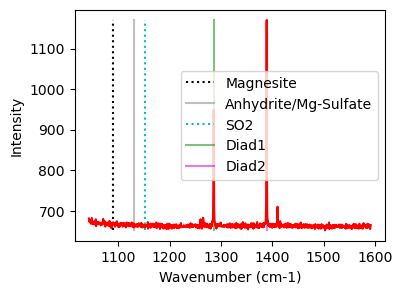

In [33]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [34]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [35]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=296.0914450312646, HB_prom=23.41672621712314, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.777323       1285.777323        0.007056        412.500423   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.533518                  0             308.800099   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  
0        3.315196        0.467538    1.067037  Flagged Warnings:

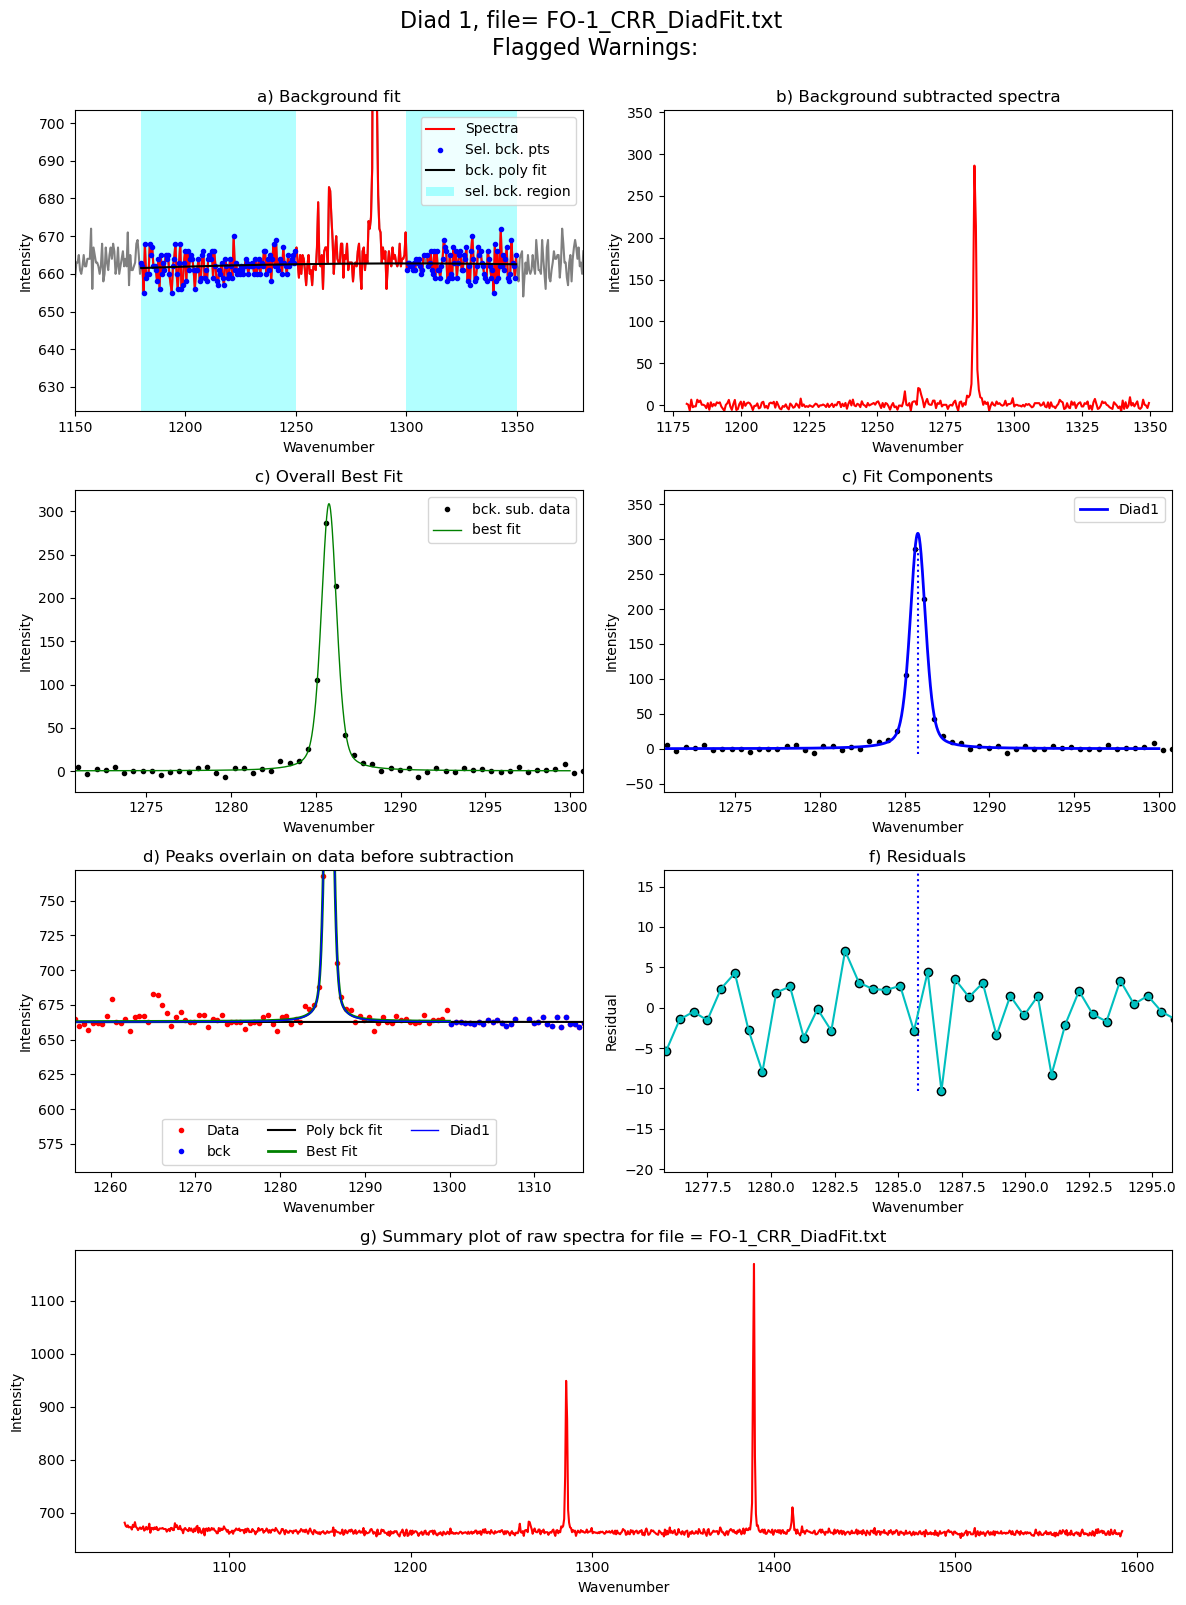

In [36]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [37]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [38]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3,
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=515.0108381511709, HB_prom=47.42567387631857, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

In [39]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=True, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.968784       1388.968784        0.005038        614.619819   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.448733                  0             538.635374   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  
0        3.390868        0.507139    0.897466  Flagged Warnings:

### Update the sigma

In [40]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.44873285580651345


## Loop over all the files in the group
- This will loop over all the 

 11%|█         | 1/9 [00:01<00:13,  1.69s/it]

refit attempt 1
refit attempt  =2, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =3, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =4, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =5, Flagged Warnings: No Error
Flagged Warnings: No Error
Got to 5 iteratoins and still couldnt adjust the fit parameters


100%|██████████| 9/9 [00:19<00:00,  2.13s/it]


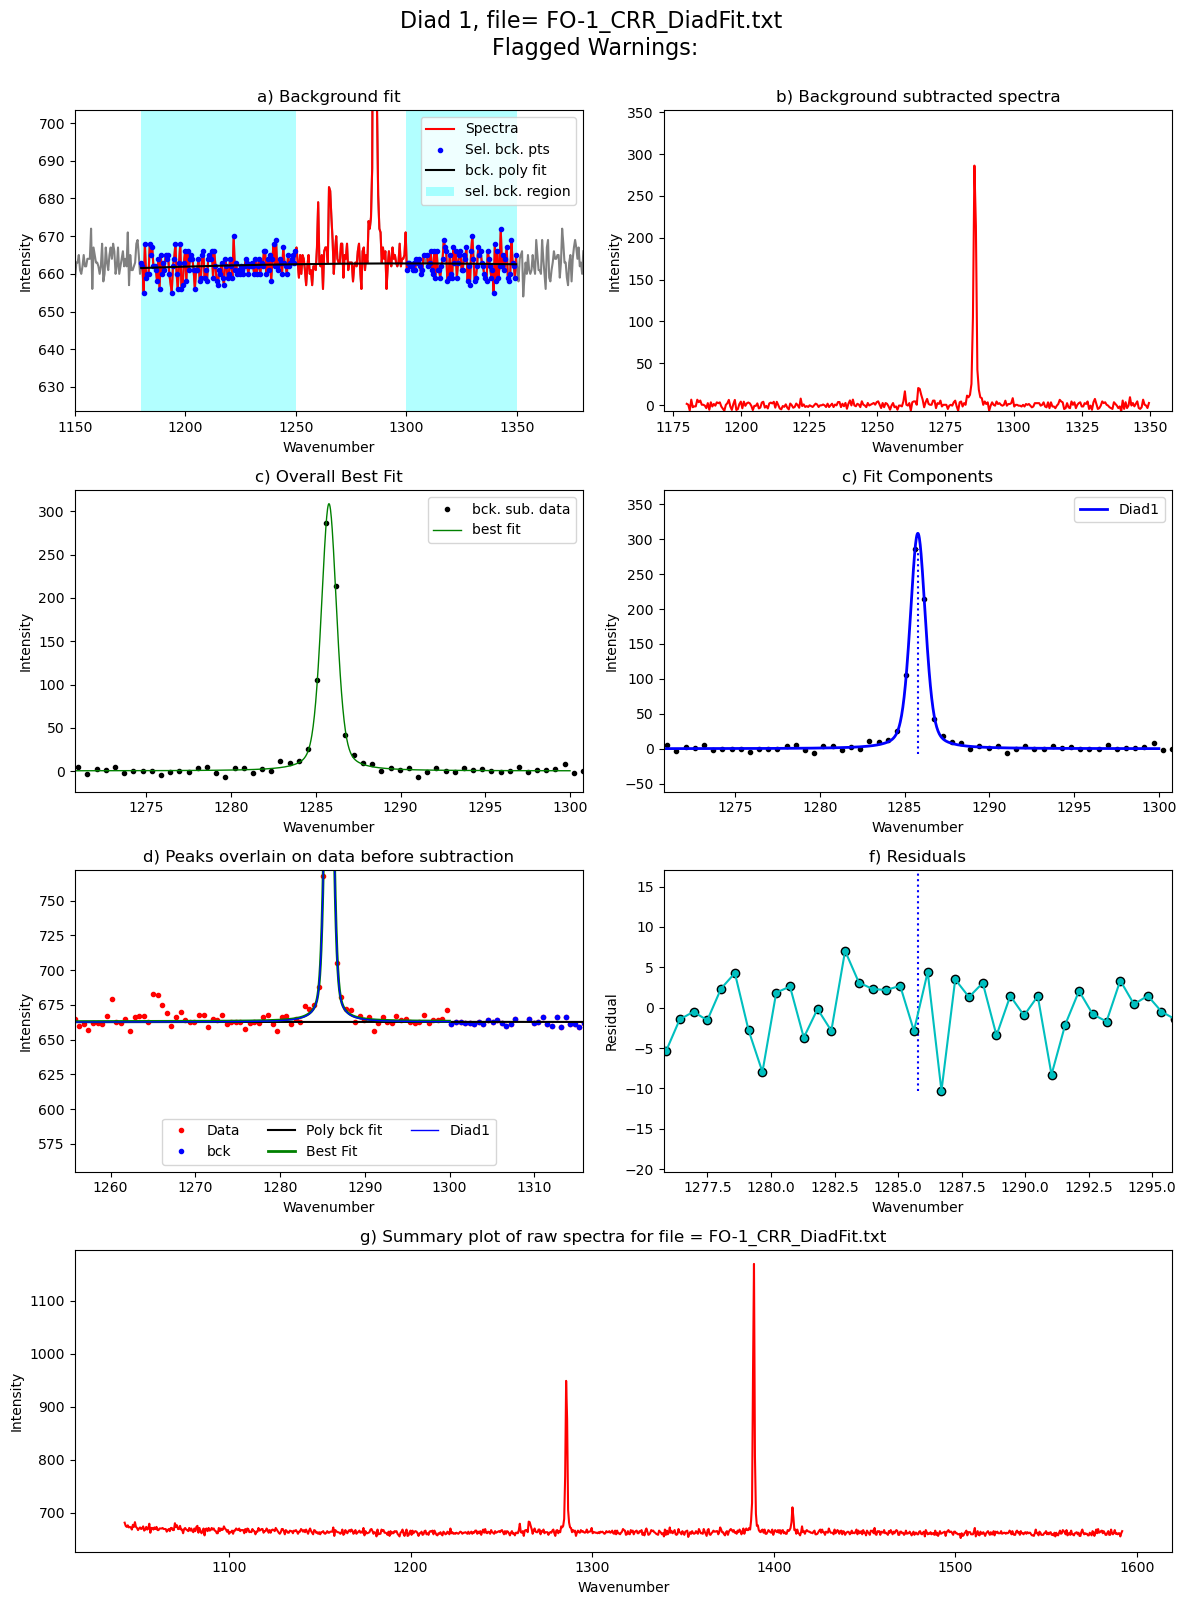

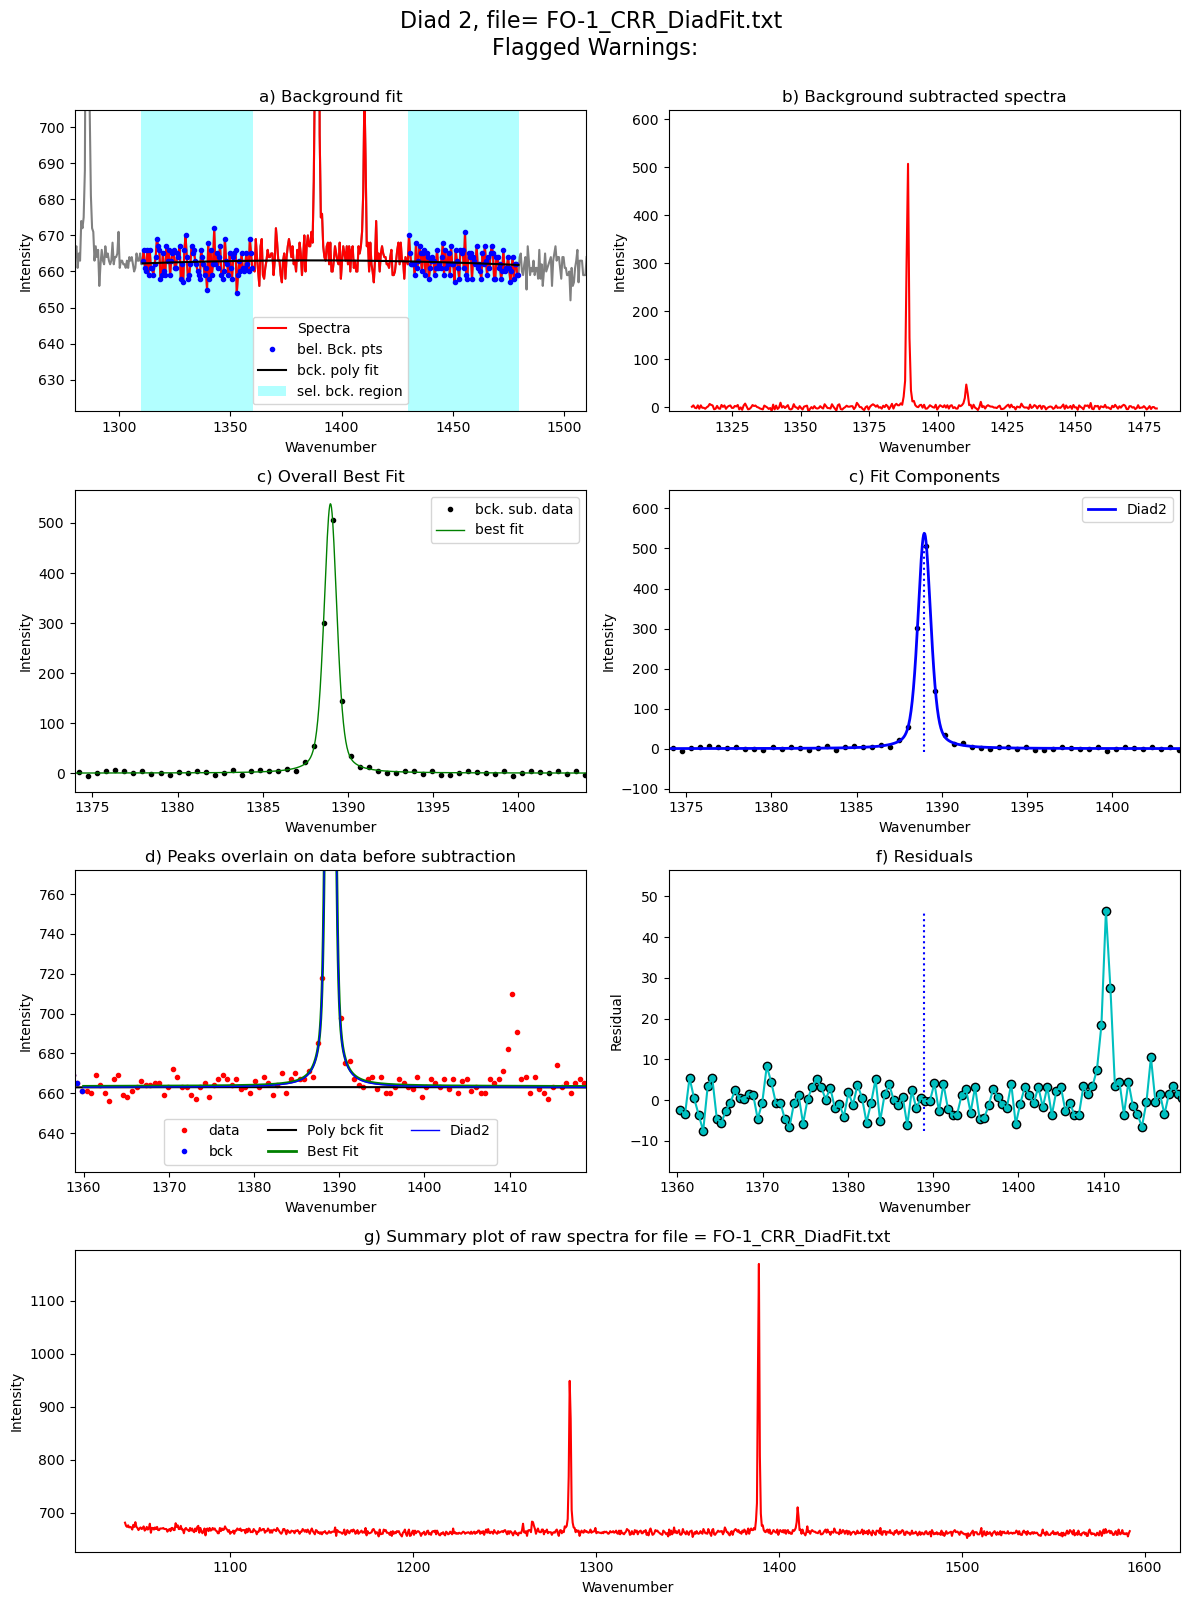

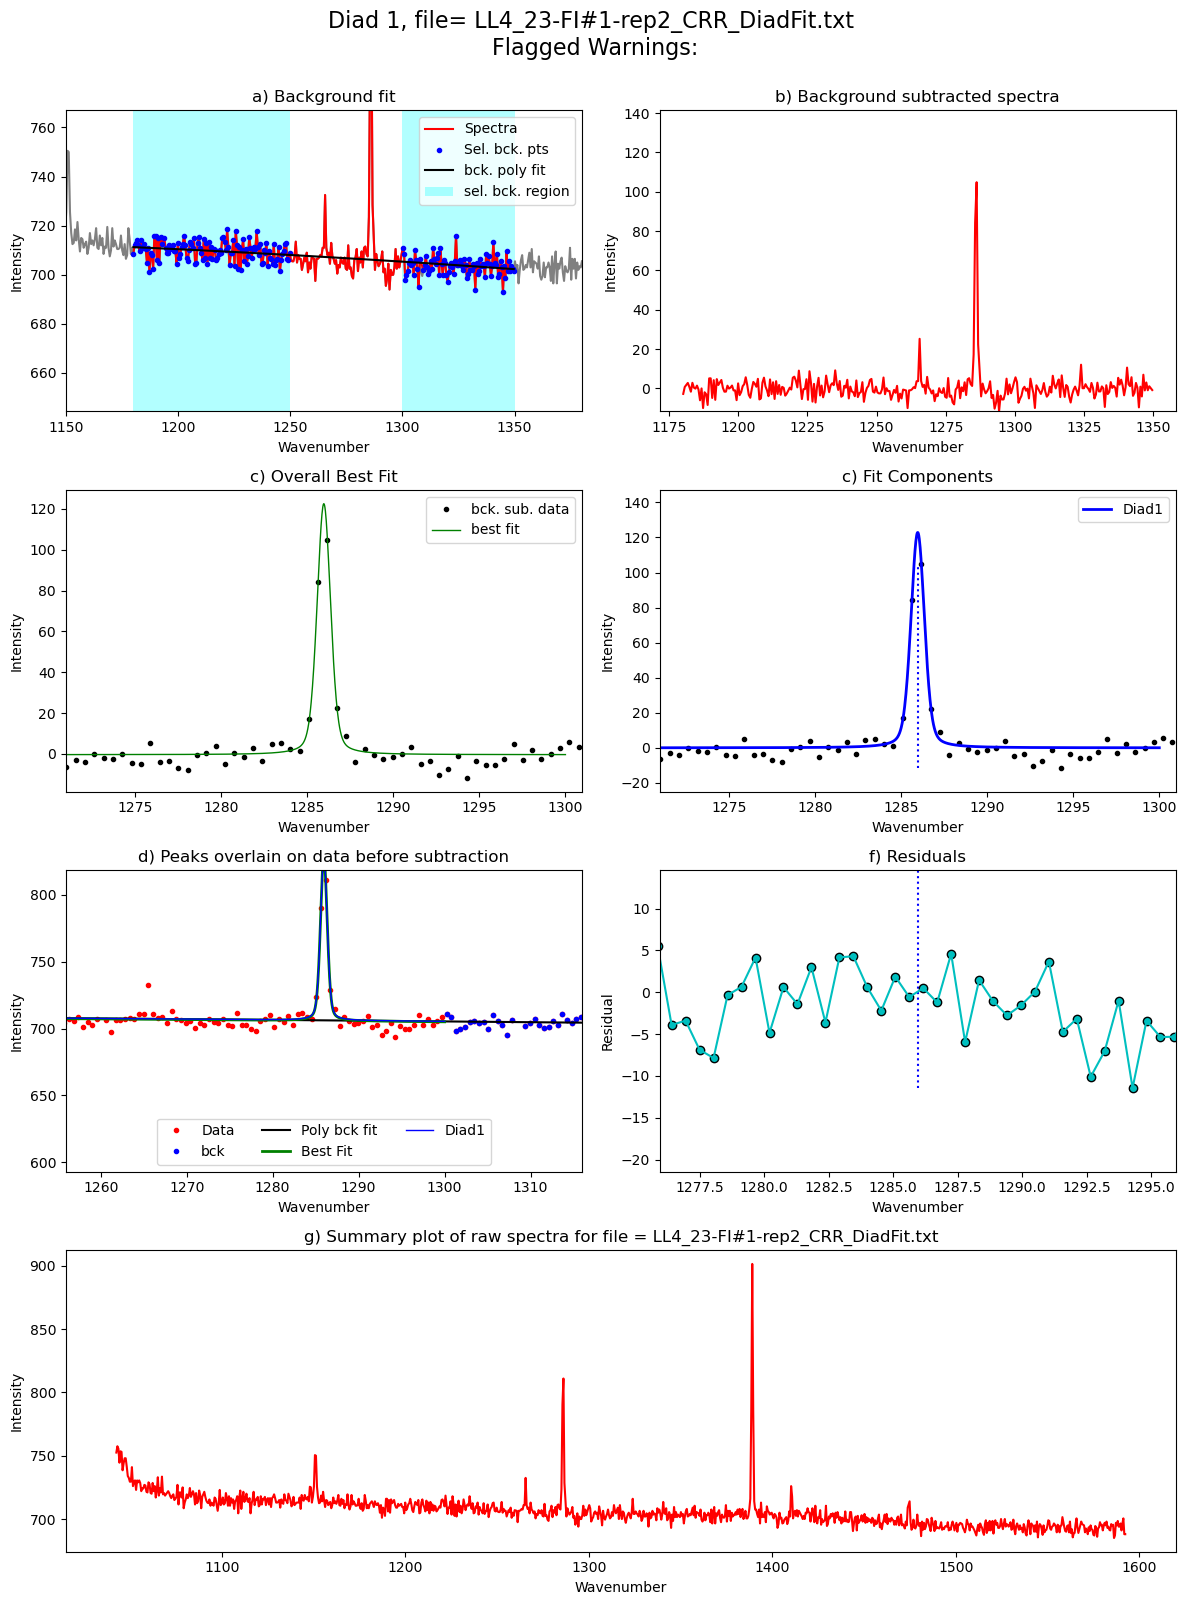

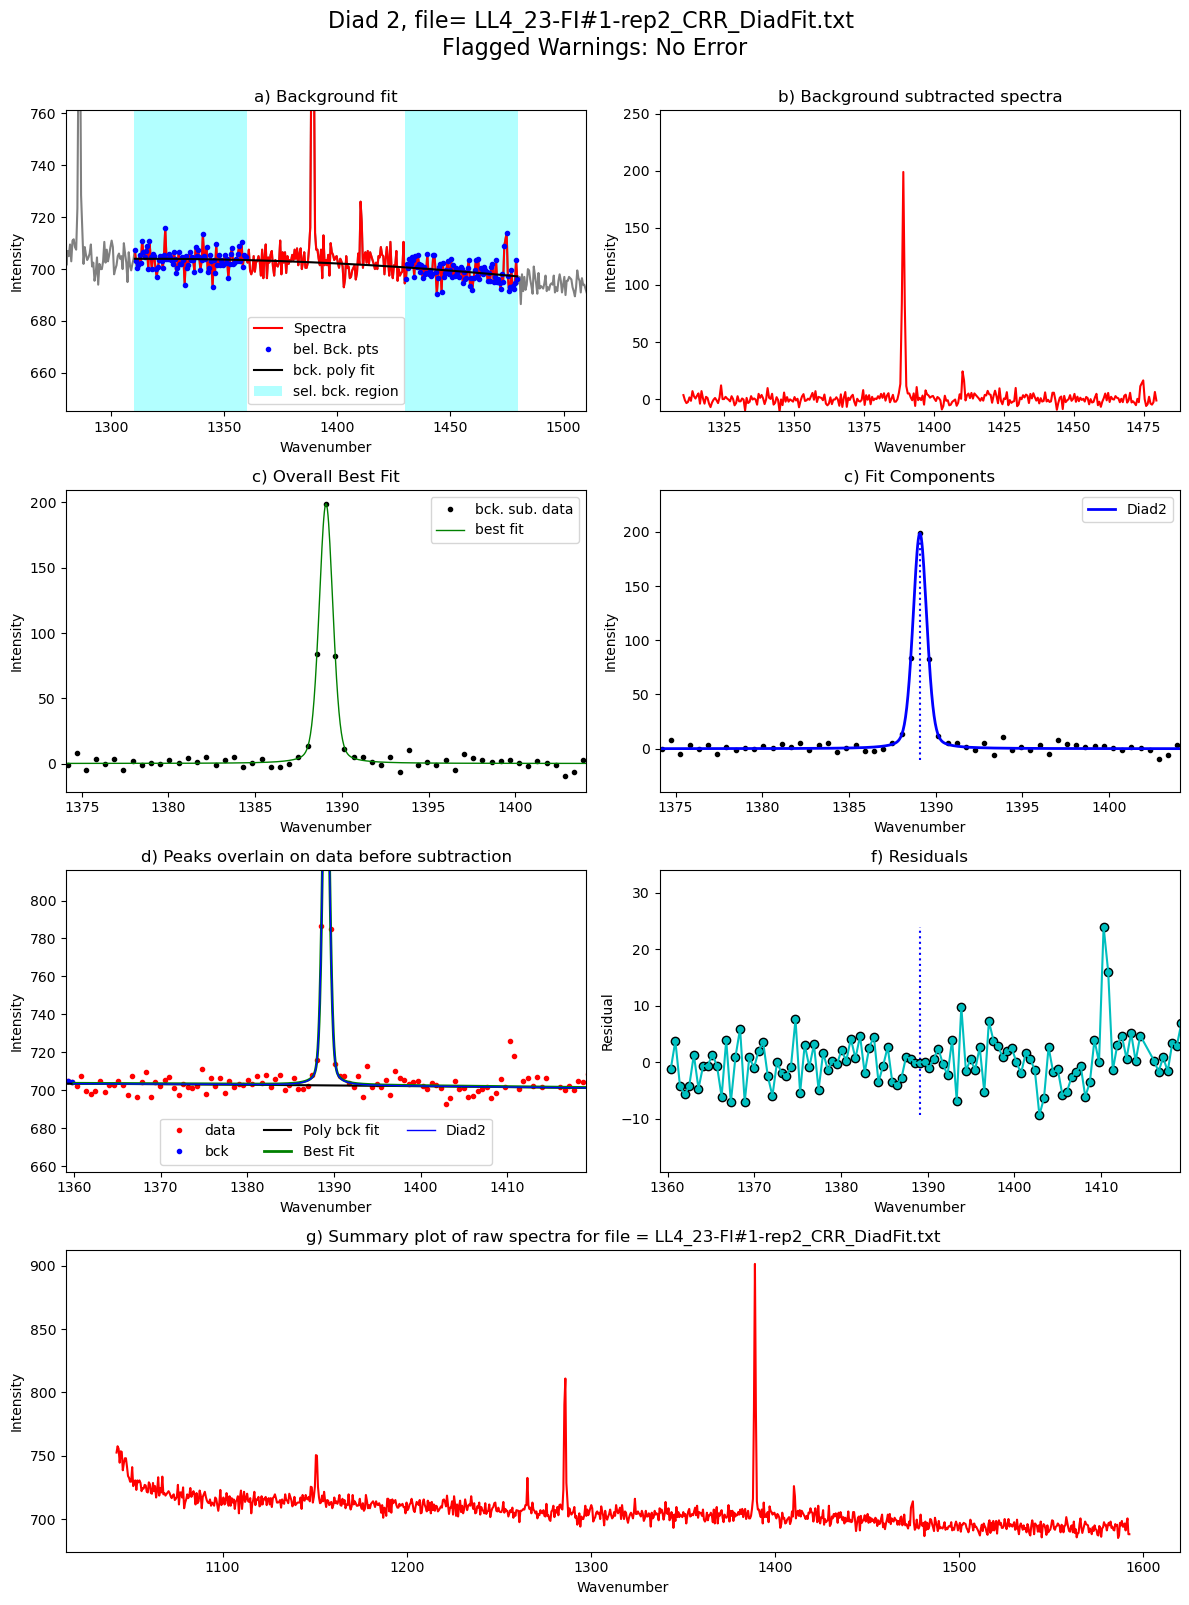

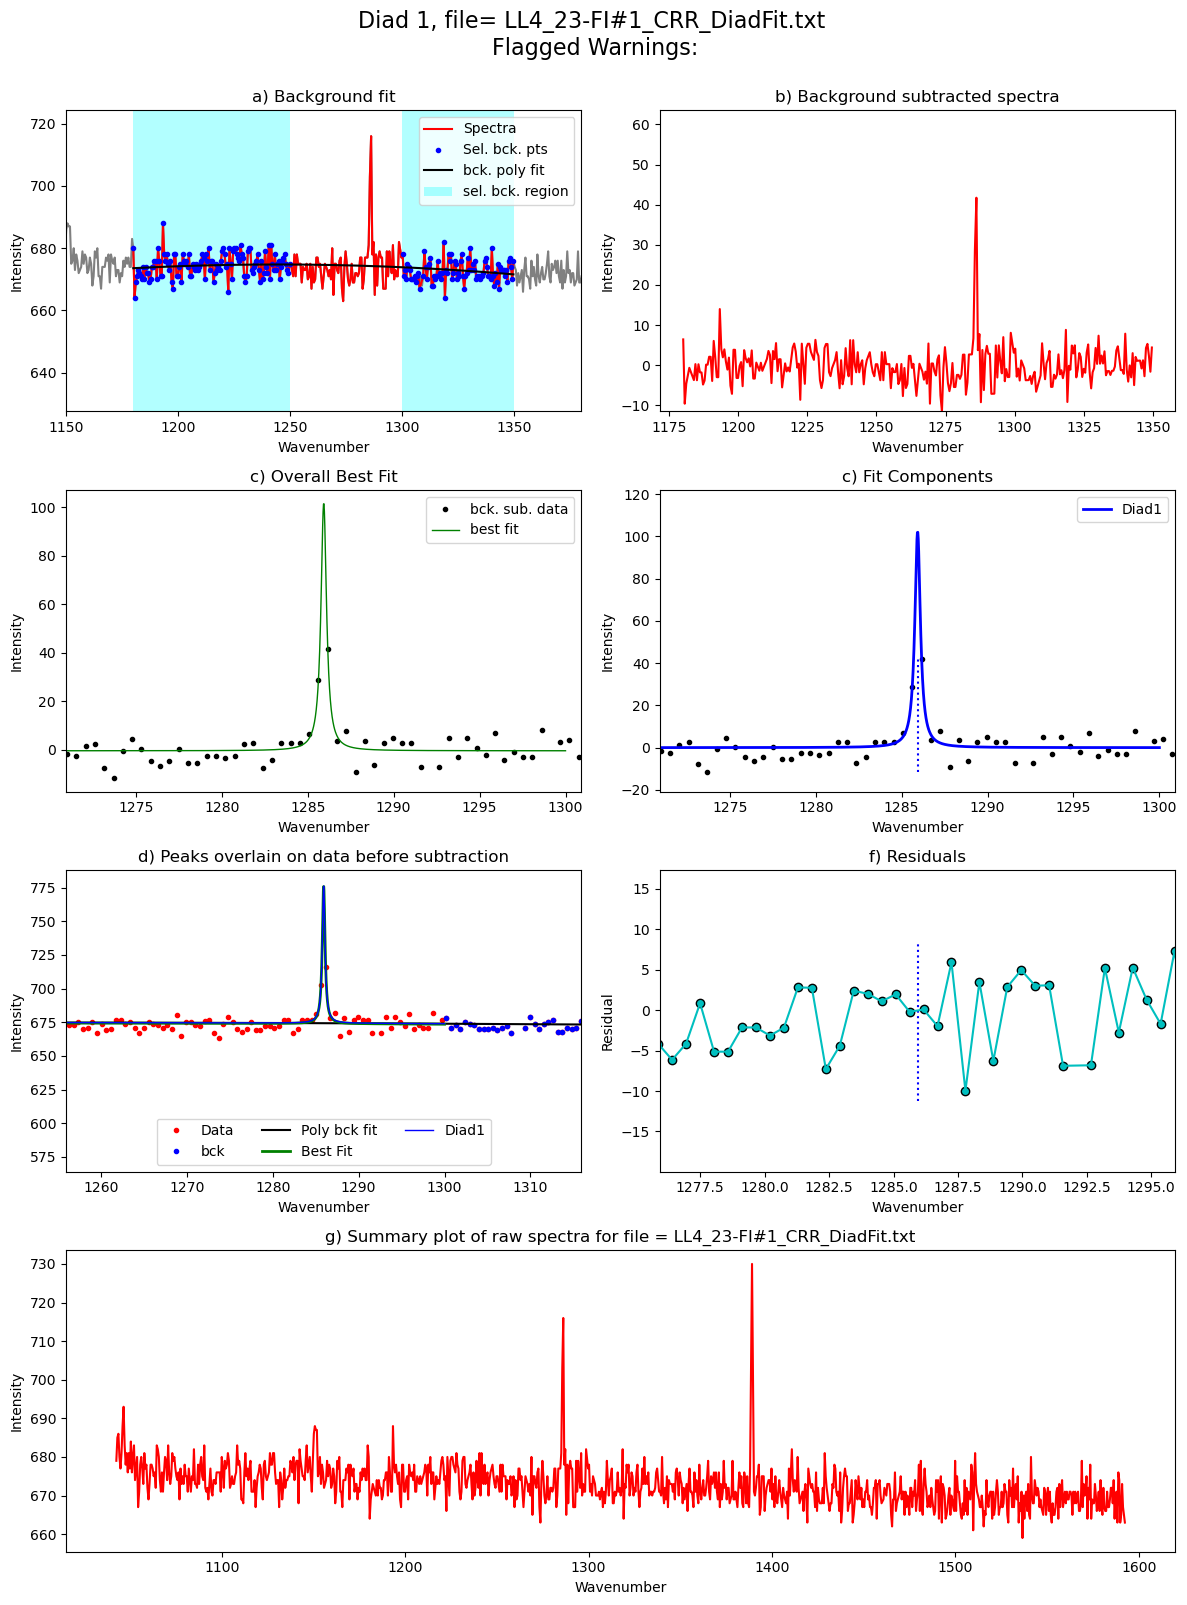

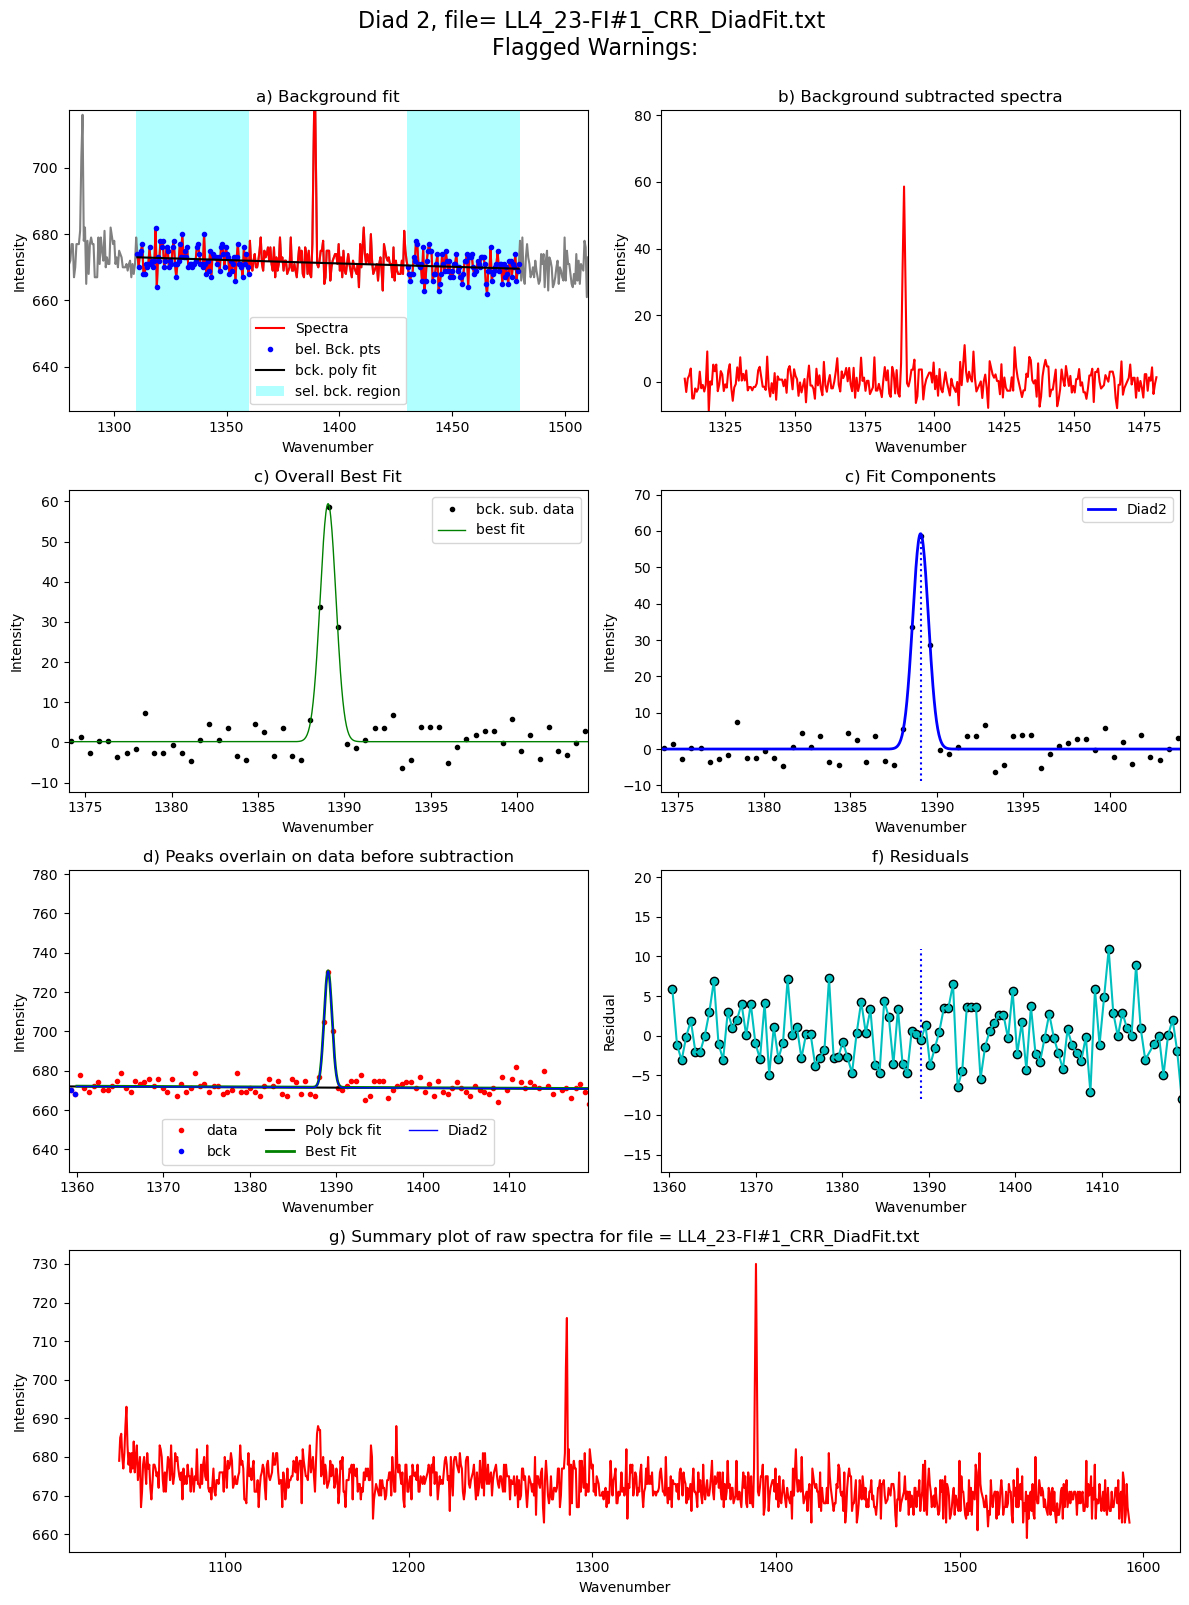

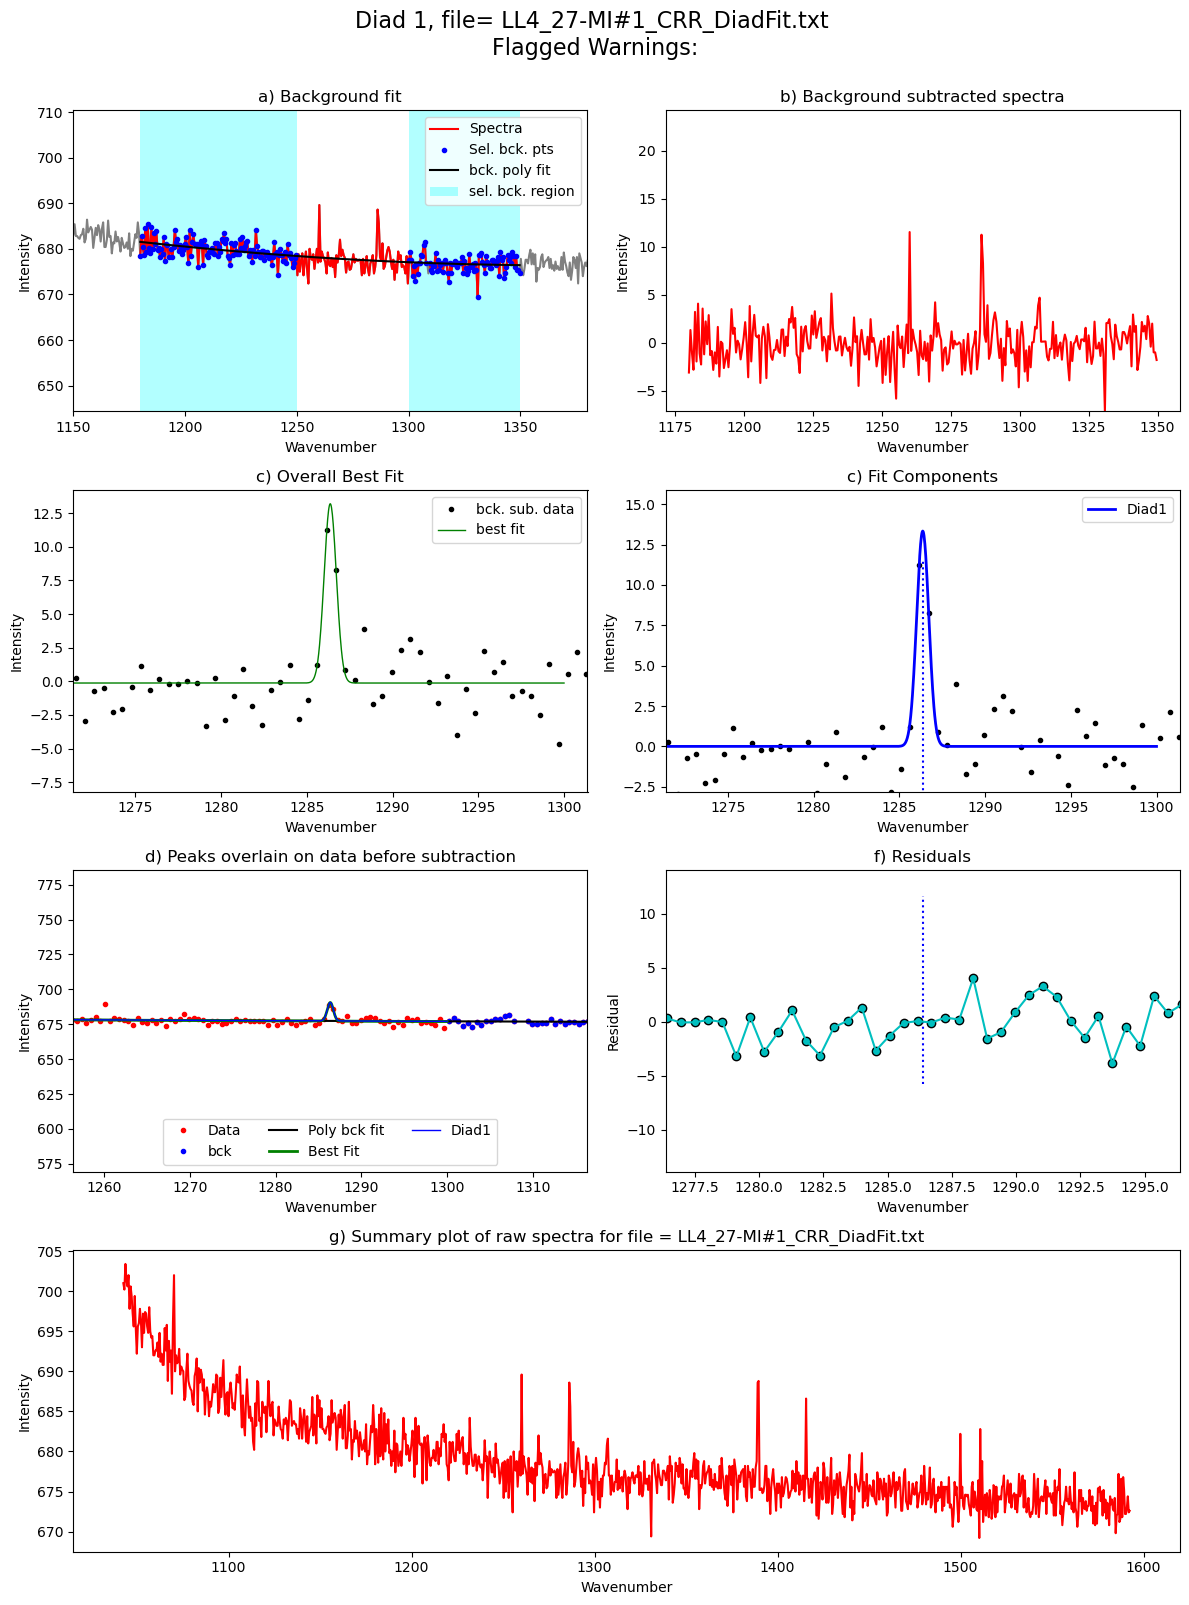

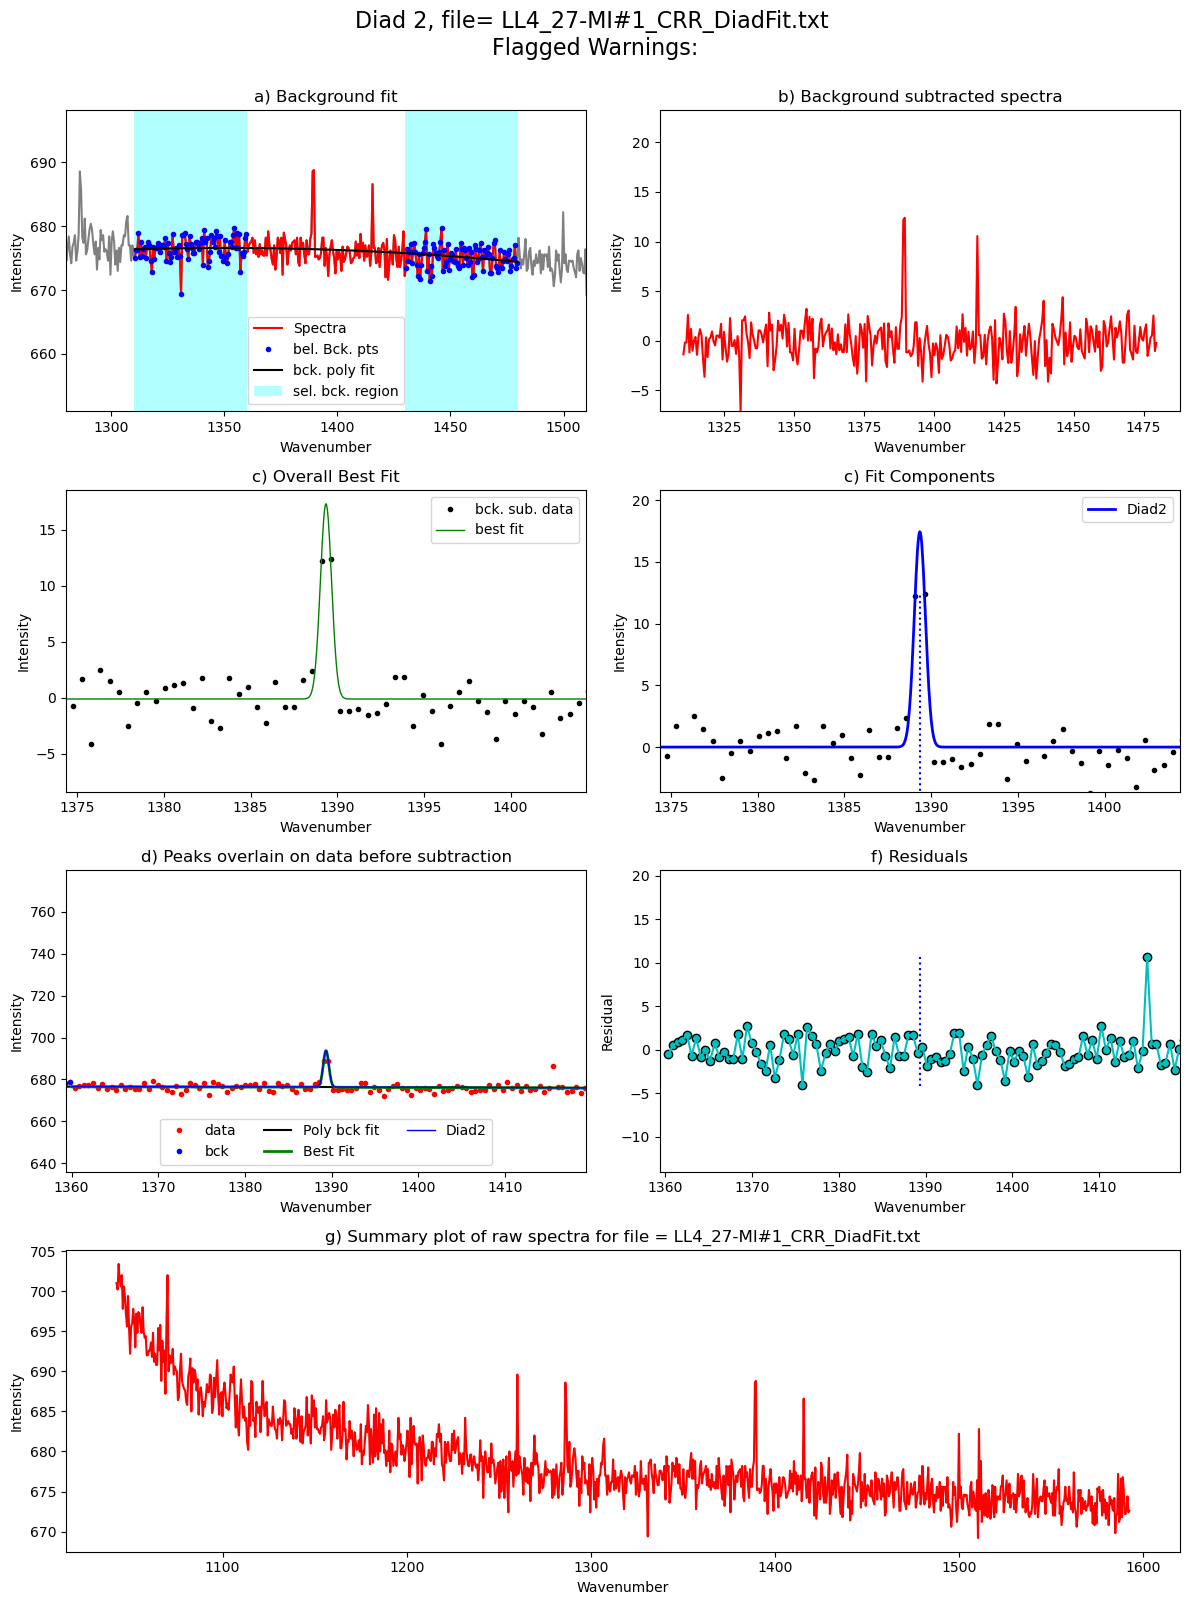

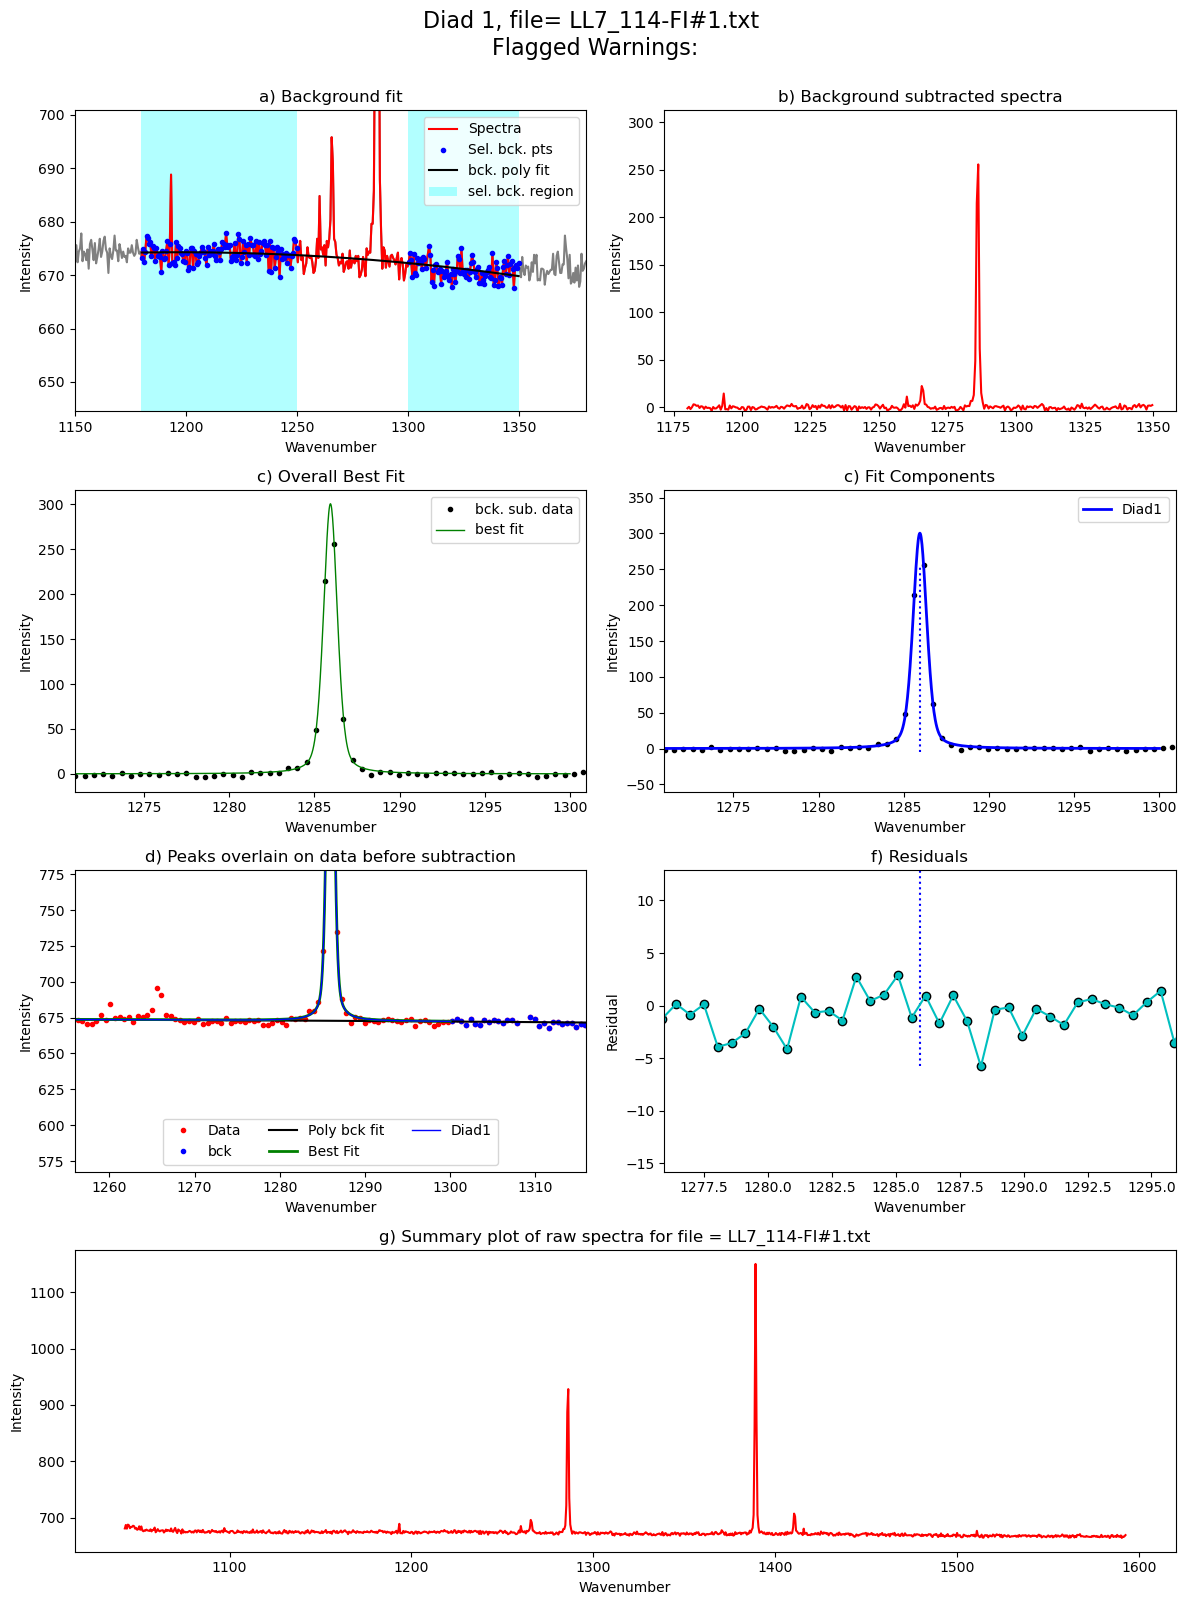

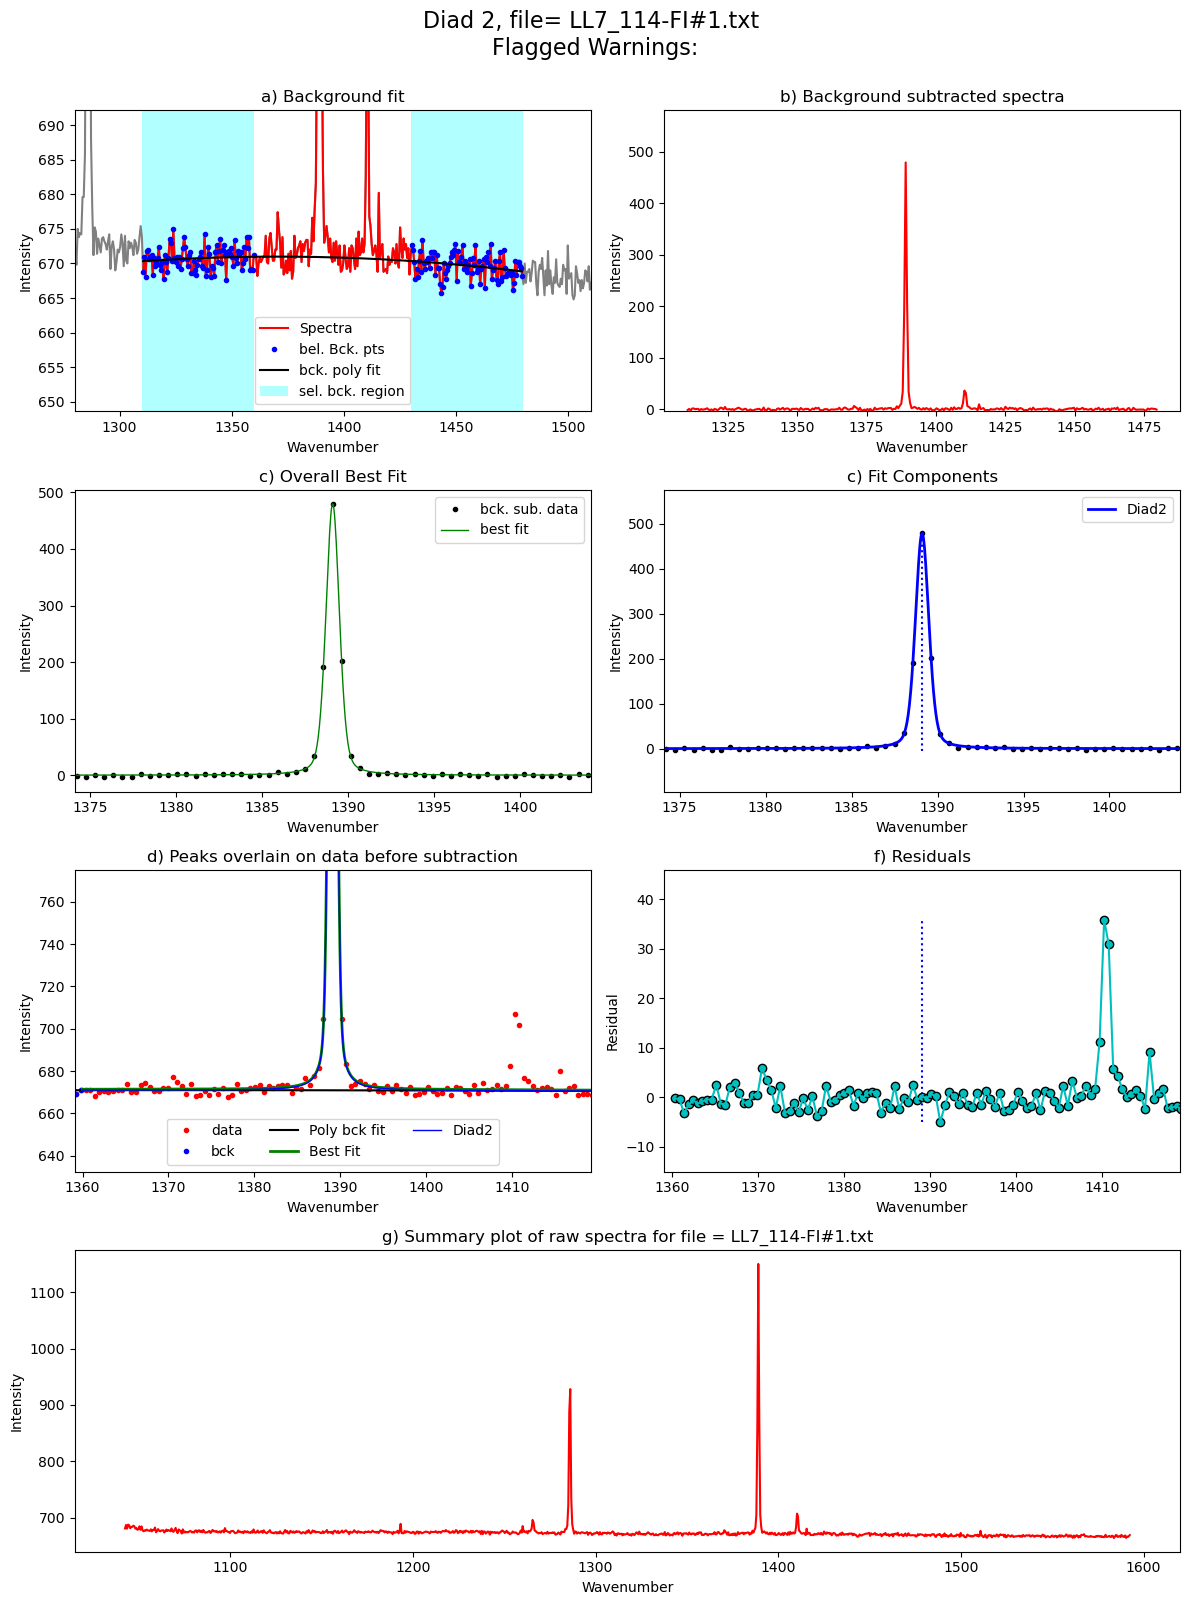

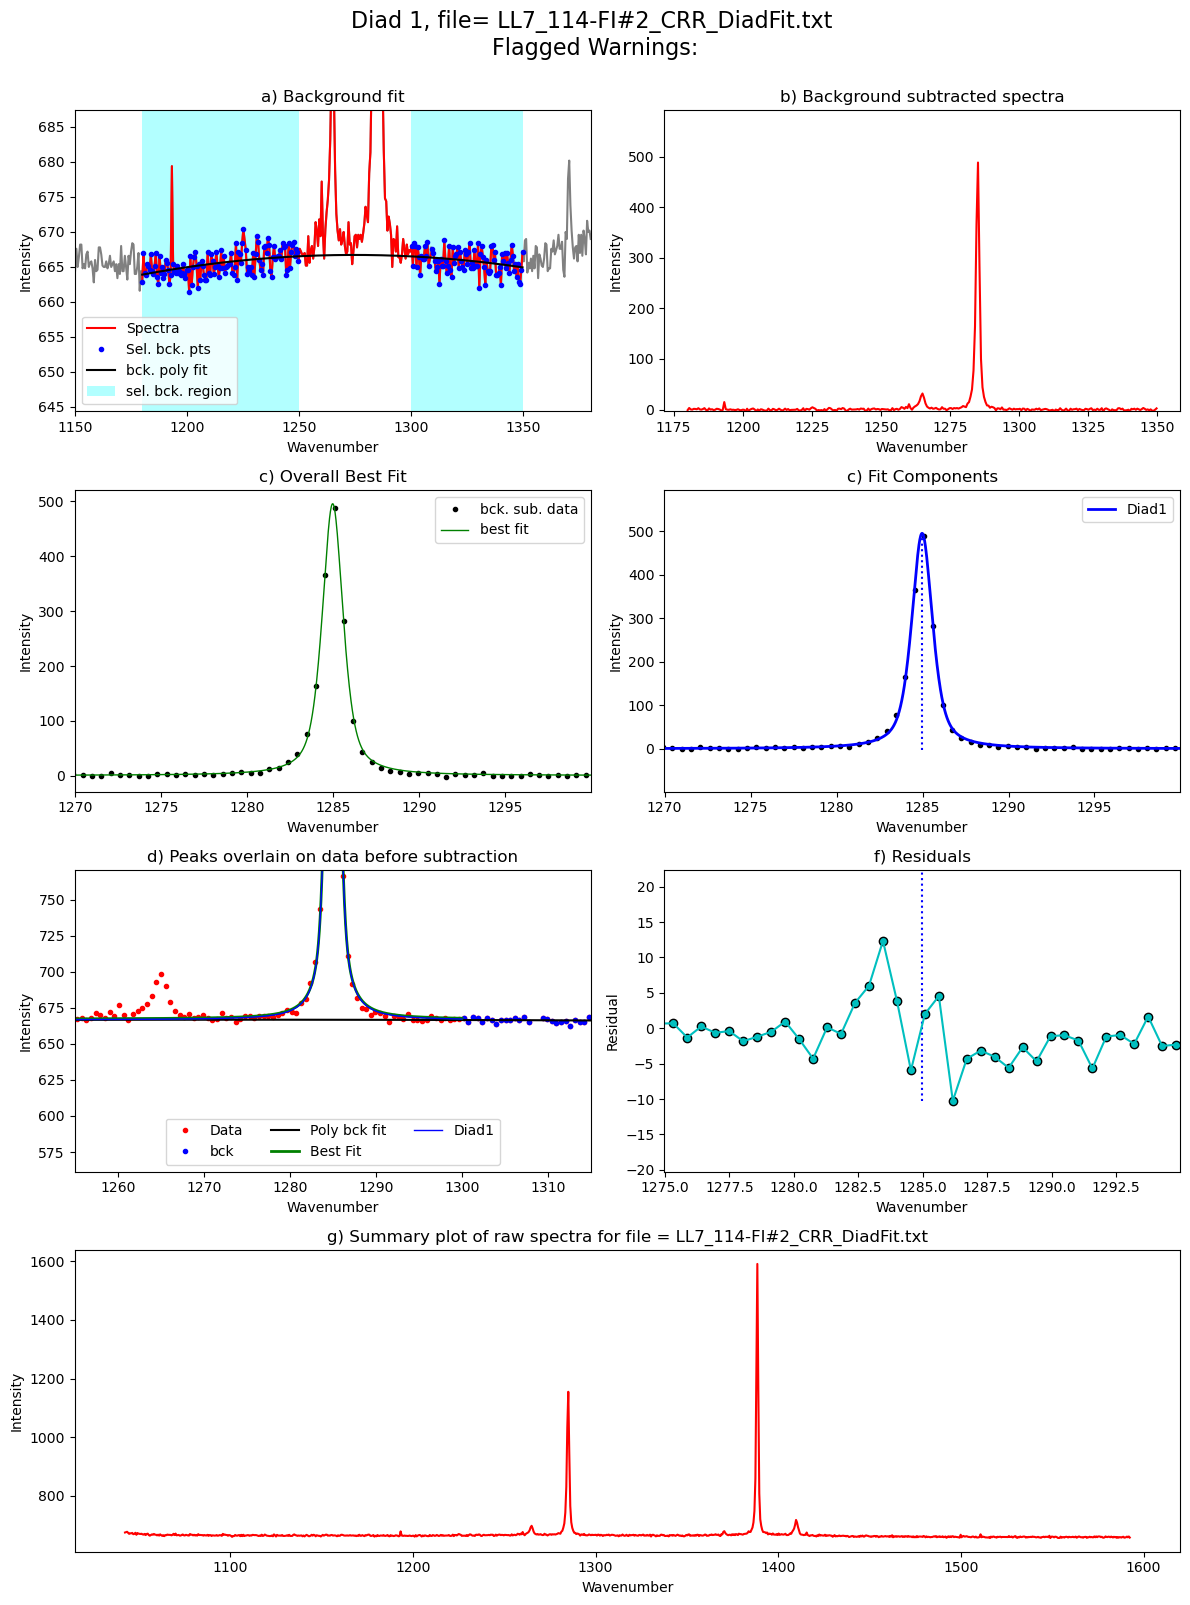

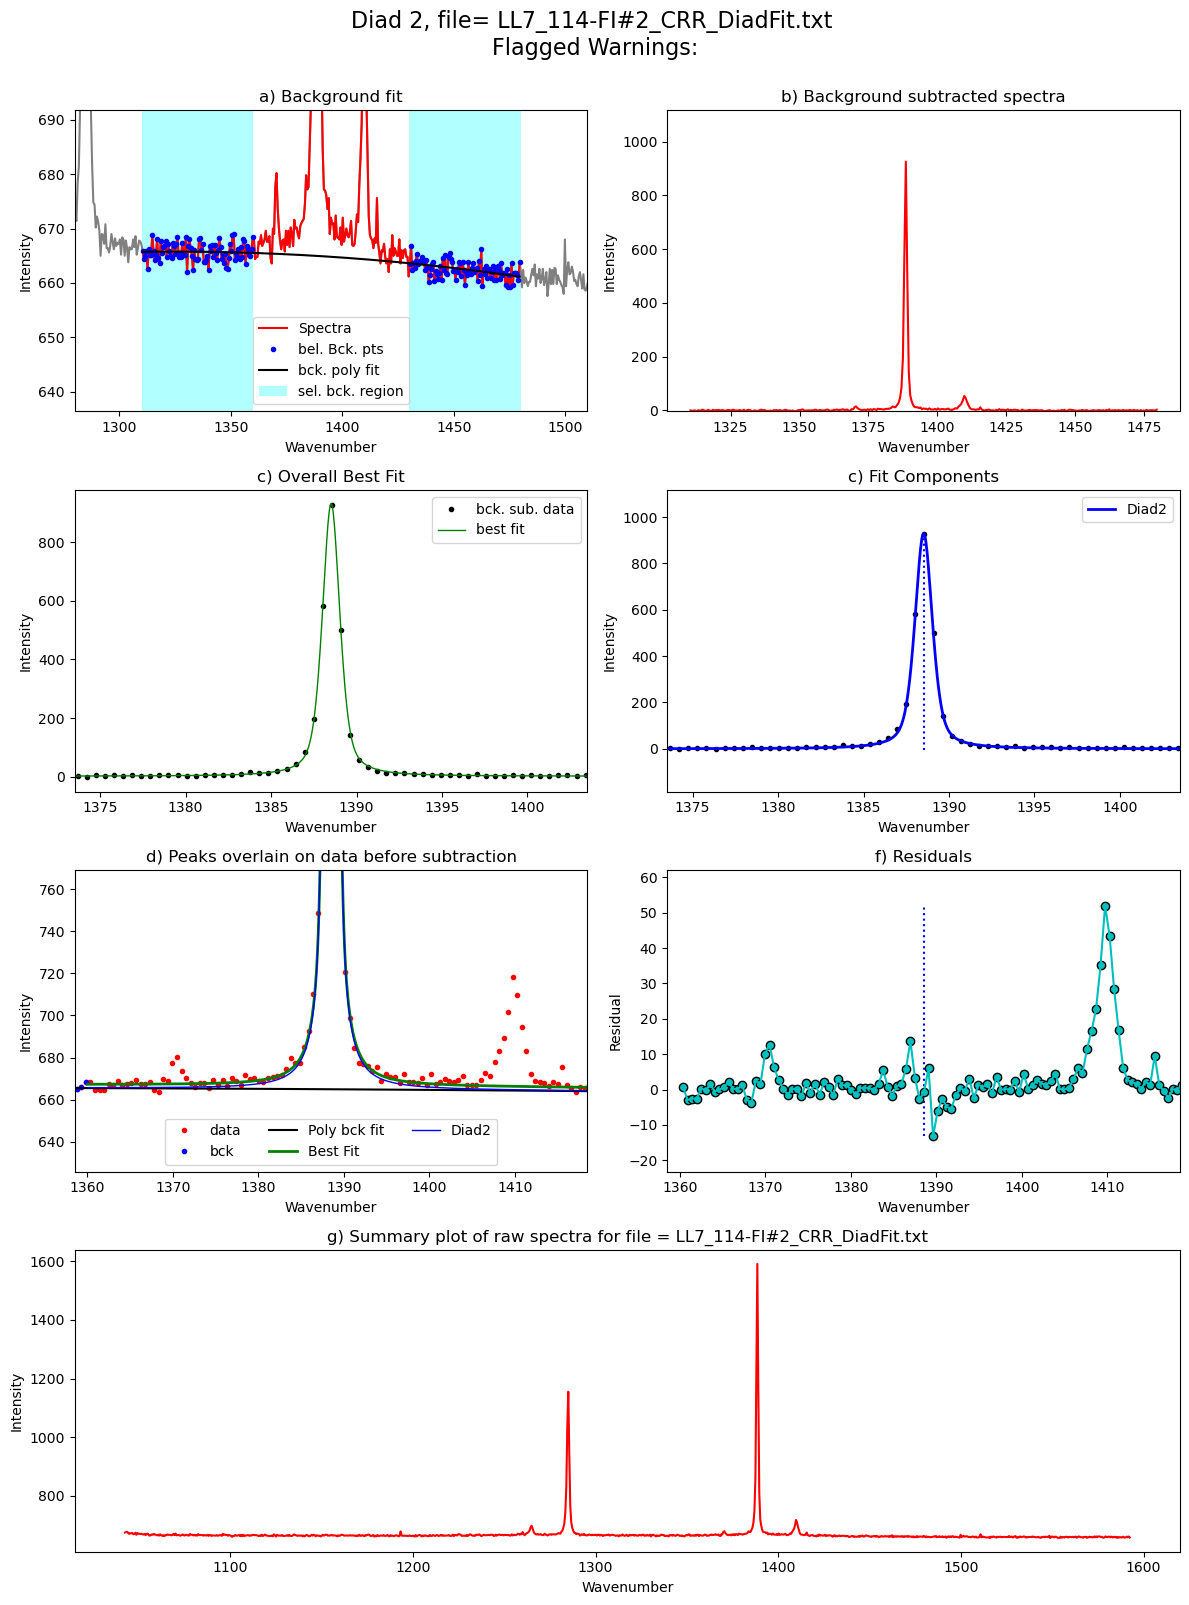

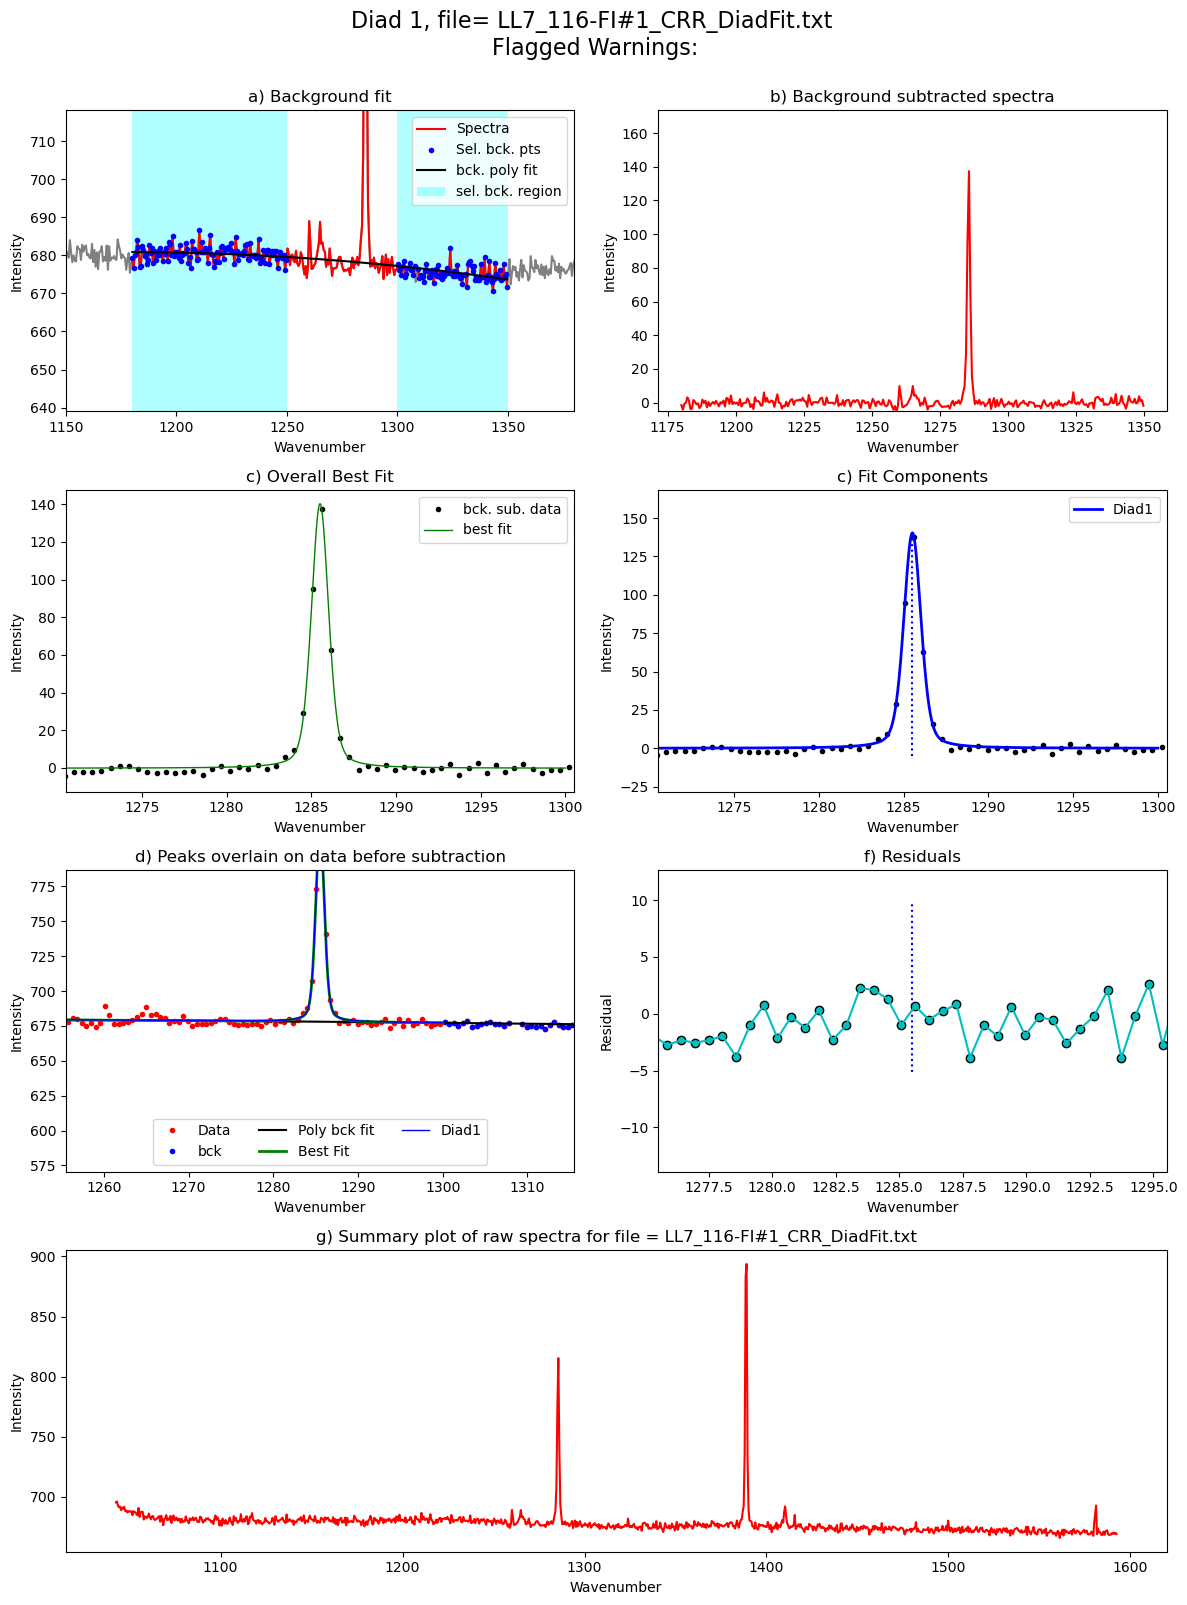

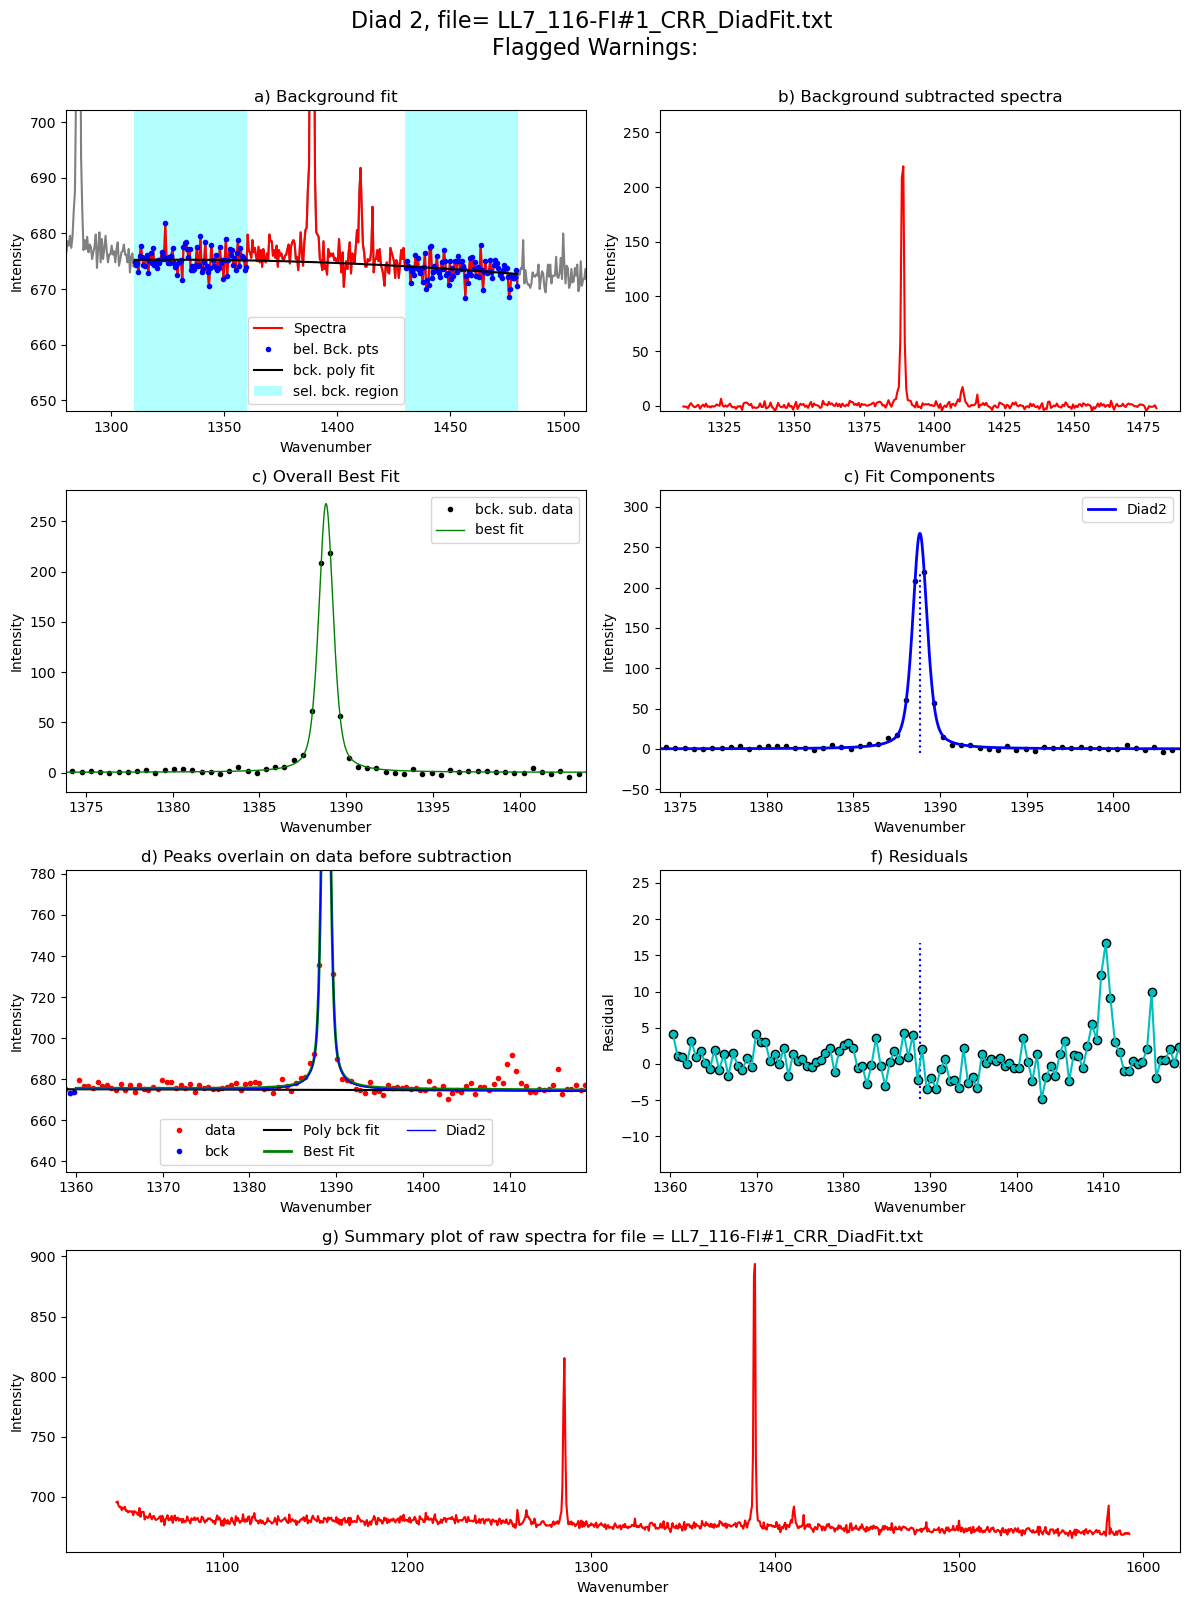

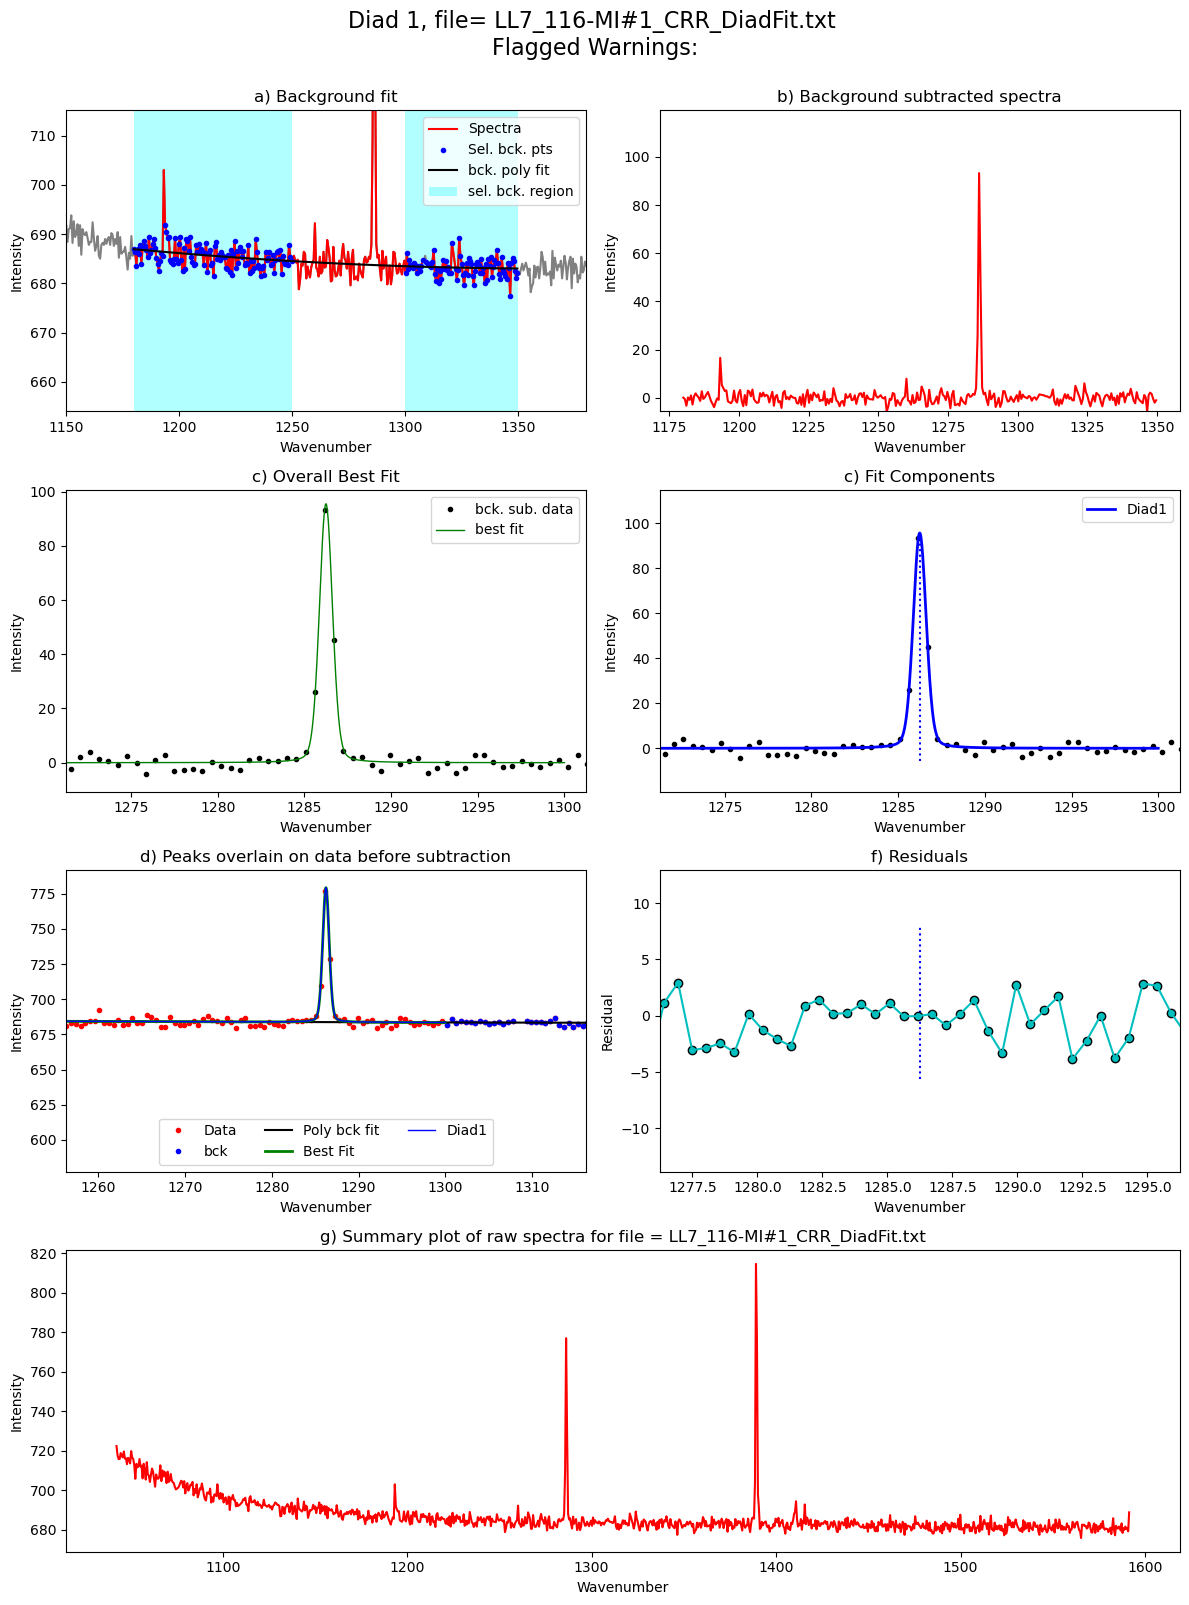

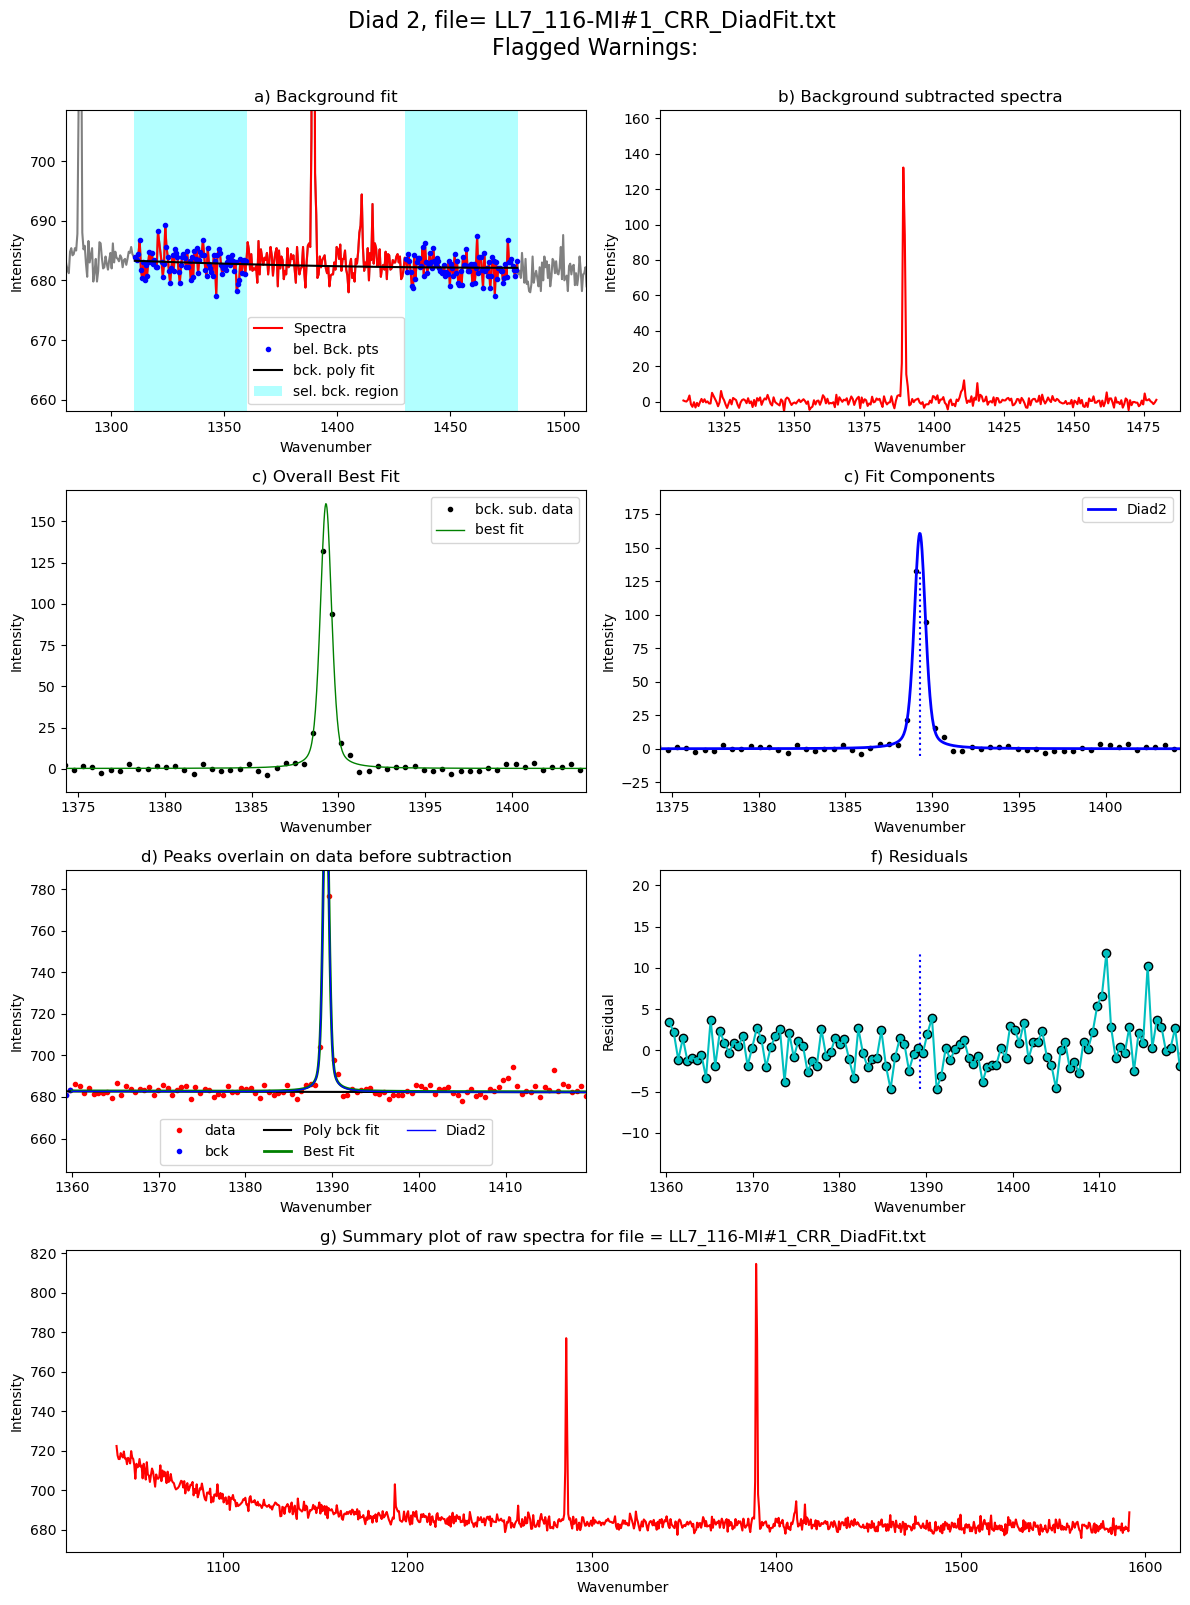

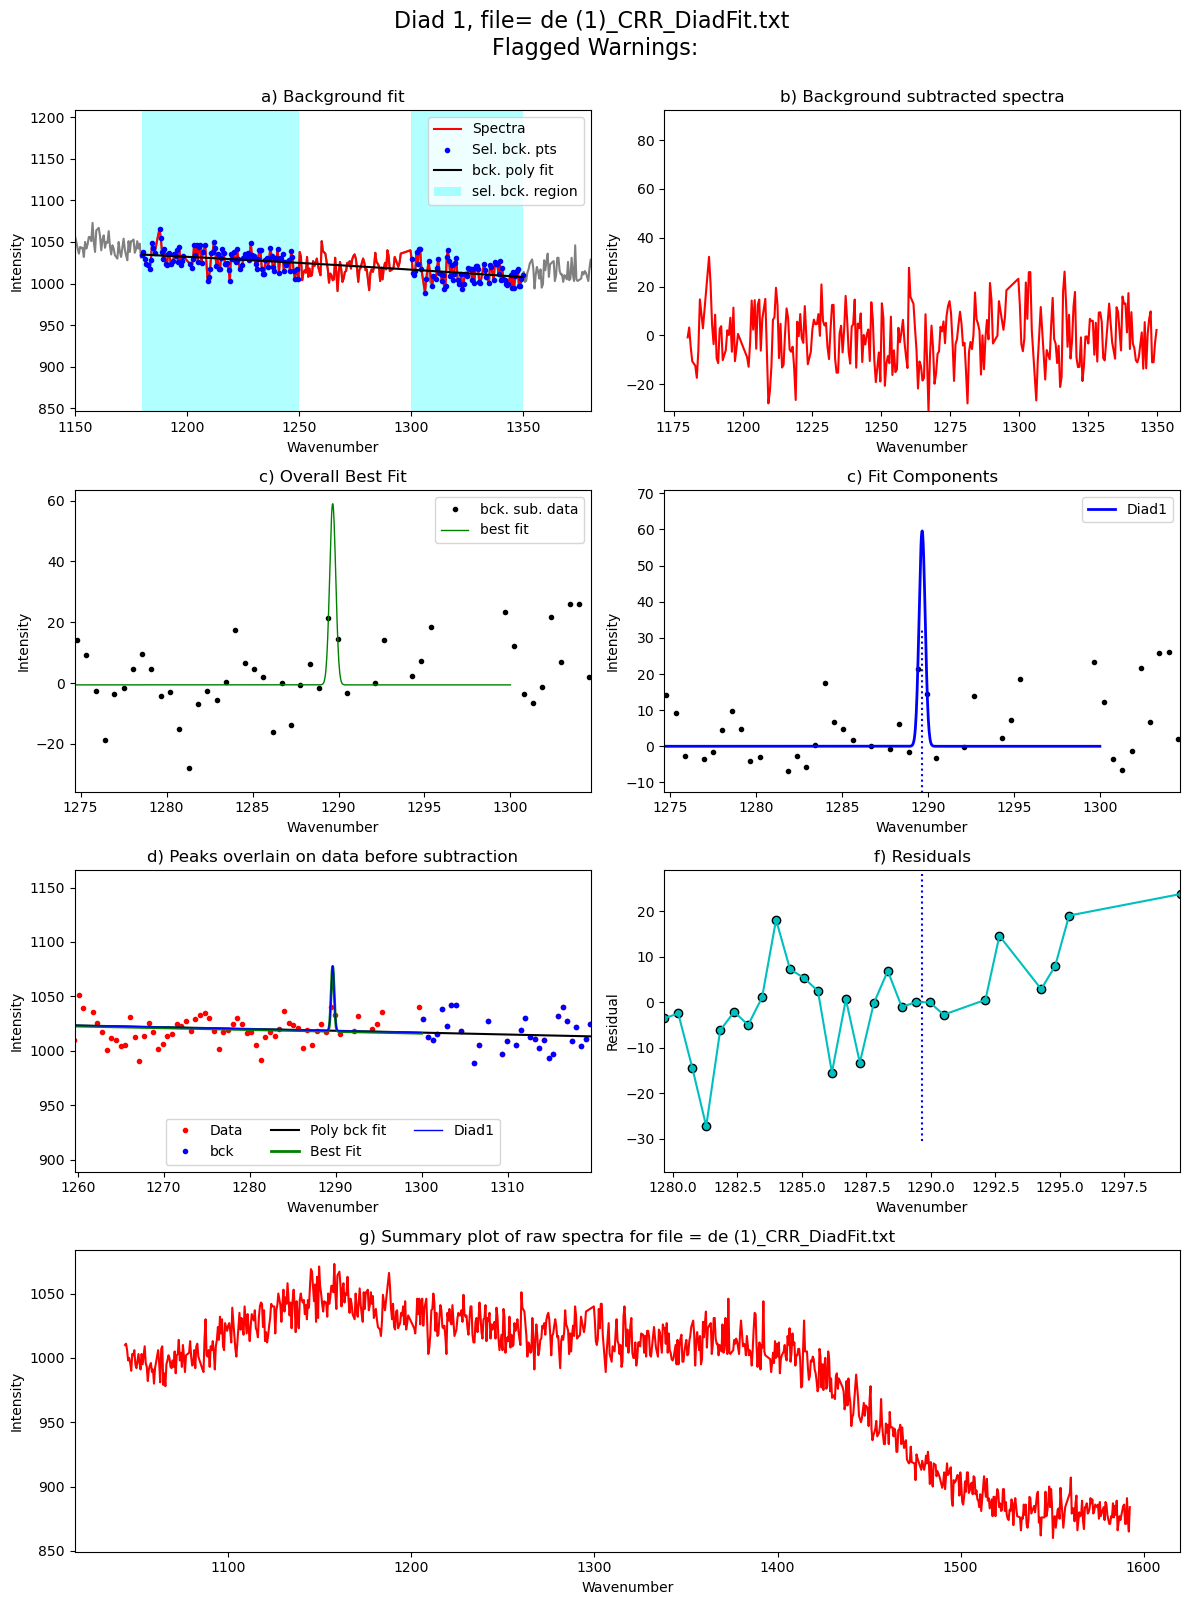

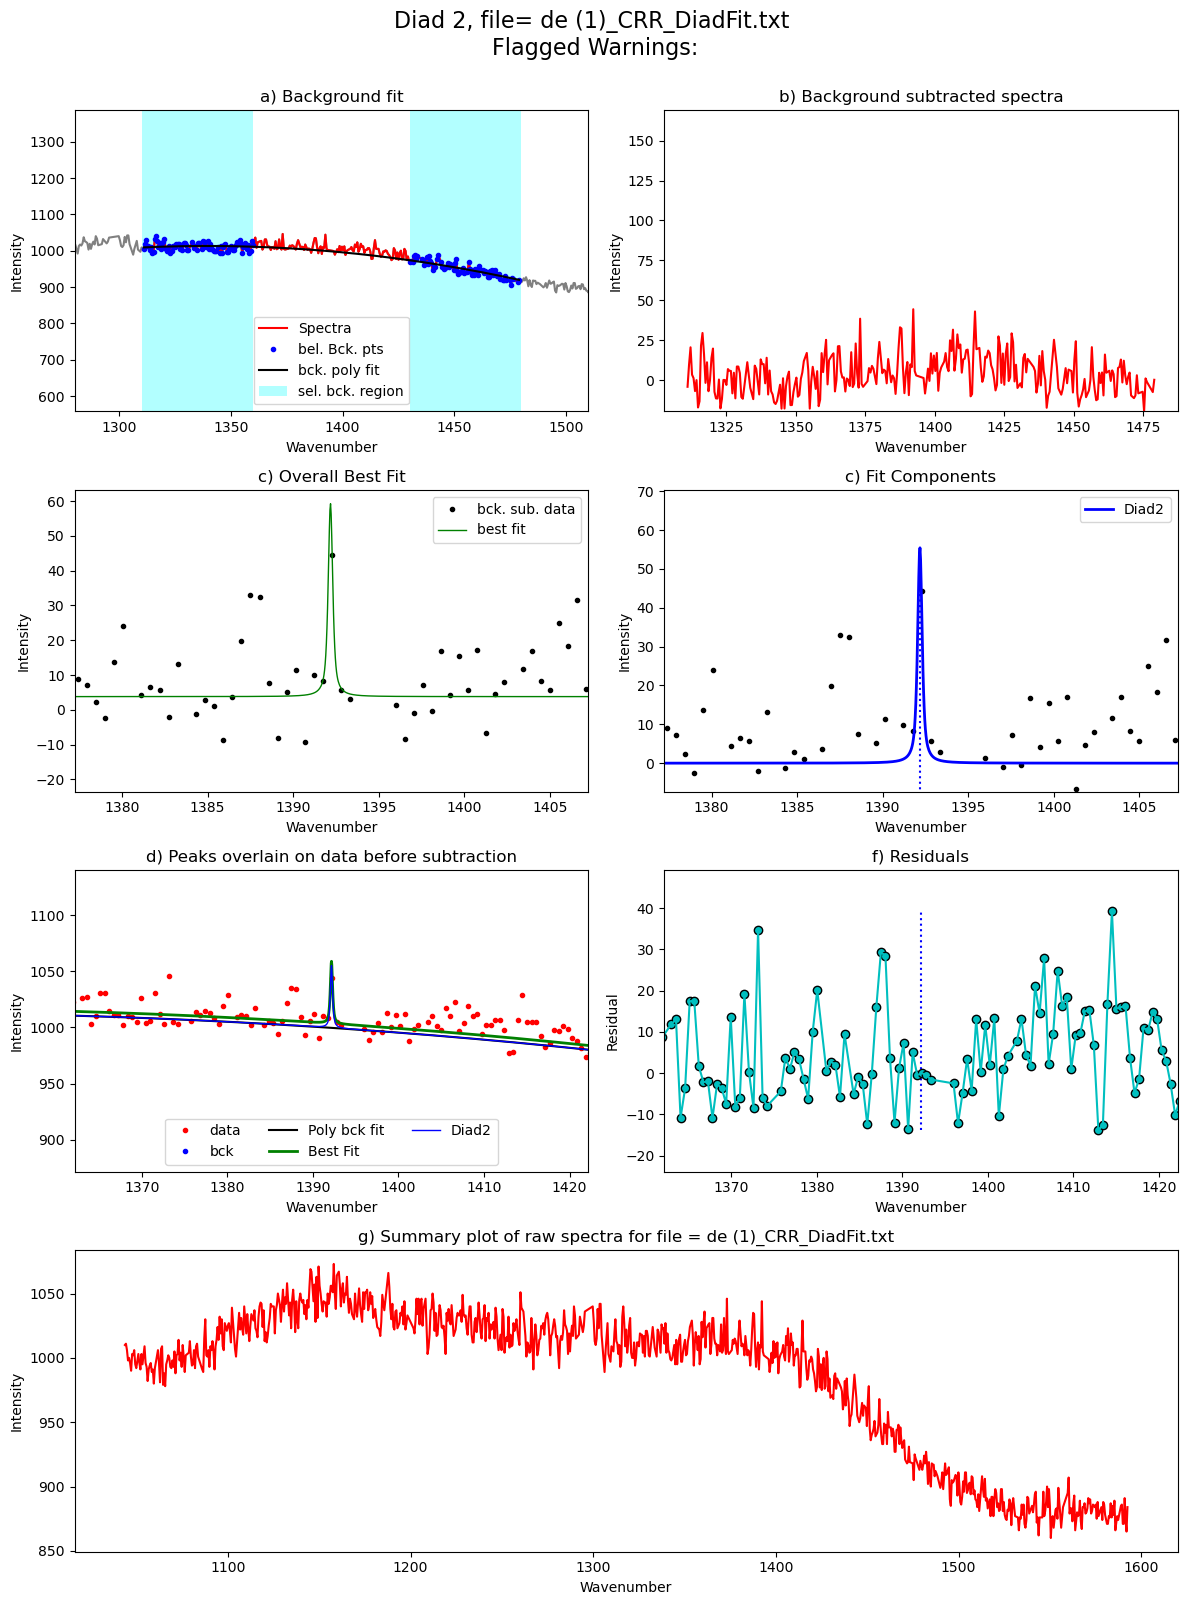

In [41]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


### Get file names that flagged a warning

In [42]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

1
0    LL4_23-FI#1-rep2_CRR_DiadFit
Name: filename, dtype: object


### Have a look at different parameters
- This can help you spot really bad fits

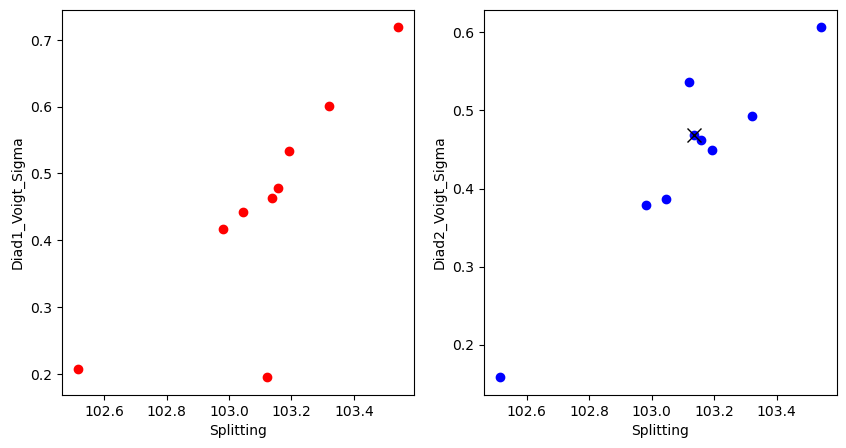

In [43]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

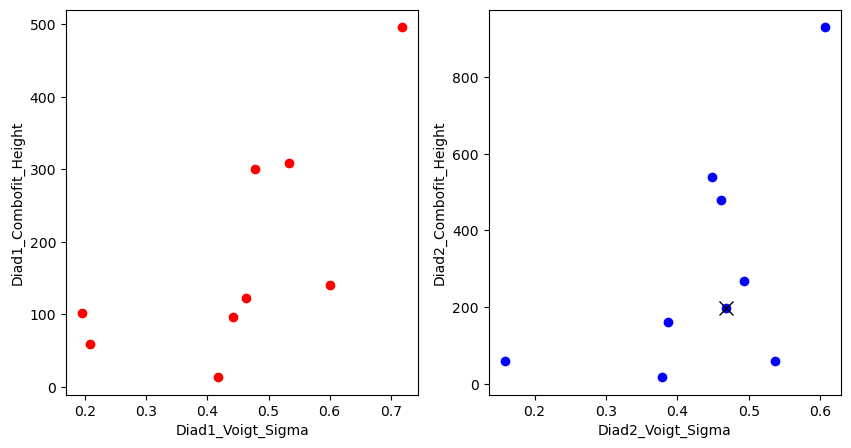

In [44]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [45]:
## Save parameters to excel

In [46]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')

In [47]:
combo.head()

filename   Splitting  Split_err_abs  \
0              FO-1_CRR_DiadFit  103.191461       0.012033   
0  LL4_23-FI#1-rep2_CRR_DiadFit  103.136530       0.017297   
0       LL4_23-FI#1_CRR_DiadFit  103.120938       0.078826   
0       LL4_27-MI#1_CRR_DiadFit  102.981339       0.116566   
0                  LL7_114-FI#1  103.158063       0.007524   

   Split_err_quadrature  Diad1_Combofit_Cent  Diad1_cent_err  \
0              0.008629          1285.777323        0.007031   
0              0.017297          1285.951866        0.017297   
0              0.058026          1285.931252        0.050820   
0              0.086599          1286.368205        0.077066   
0              0.005374          1285.942820        0.004296   

   Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0             308.800624       1285.777323        412.501097   
0             122.513583       1285.951866        139.089264   
0             101.871555       1285.931252         62.667583   
0              13.206776       1286.368205         11.838700   
0             300.522041       1285.942820        358.376321   

   Diad1_Voigt_Sigma  ...  HB2_Sigma  C13_Cent  C13_Area C13_Sigma  \
0           0.533517  ...        NaN       NaN       NaN       NaN   
0           0.463812  ...        NaN       NaN       NaN       NaN   
0           0.195090  ...        NaN       NaN       NaN       NaN   
0           0.417064  ...        NaN       NaN       NaN       NaN   
0           0.477553  ...        NaN       NaN       NaN       NaN   

   Diad2_Gauss_Cent  Diad2_Gauss_Area  Diad2_Gauss_Sigma  Diad1_Gauss_Cent  \
0               NaN               NaN                NaN               NaN   
0               NaN               NaN                NaN               NaN   
0               NaN               NaN                NaN               NaN   
0               NaN               NaN                NaN               NaN   
0               NaN               NaN                NaN               NaN   

   Diad1_Gauss_Area  Diad1_Gauss_Sigma  
0               NaN                NaN  
0               NaN                NaN  
0               NaN                NaN  
0               NaN                NaN  
0               NaN                NaN  

[5 rows x 40 columns]

In [48]:
from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3_FitAll_Together is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()